# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

In [2]:
## Input params used outside this notebook
# params = {'gaussian_number': 4, 'file_path': "./data/NCDC/uk/weybourne/dat.txt"}
dictget = lambda d, *k: [d[i] for i in k]
if 'params' in globals():
    input_file_path, NUMBER_OF_GAUSSIAN, FIT_METHOD, KDE_GRIDSEARCH = dictget(params, 'input_file_path', 
                                                                              'gaussian_number', 
                                                                              'fit_method', 'kde_gridsearch')

## 1.2 Read Data

In [3]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
ipath= './data/NCDC/tiree.txt' # try 4
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # initial speed 
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # problematic data, tail with no end
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # generally good, one direction big deviation
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # high initial speed
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse; watch for bandwidth
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # problem data?

# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall, few 0 records
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # watch for bandwidth? could apply width/length constrain
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" 
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

if 'params' in globals(): ipath = input_file_path

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [4]:
df = df.query("(dir <= 999) & (speed <= 999) & \
              (date >= 19800000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


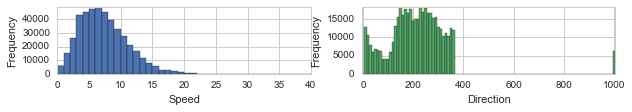

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  4.509690e+05  450969.000000  450969.000000  450969.000000   
mean   2.000358e+07    1152.688012     204.787735       7.263098   
std    1.089499e+05     668.366762     128.607443       3.834424   
min    1.980010e+07       0.000000       0.000000       0.000000   
25%    1.991013e+07     600.000000     130.000000       4.600000   
50%    2.002051e+07    1120.000000     200.000000       6.700000   
75%    2.011022e+07    1700.000000     270.000000       9.800000   
max    2.015080e+07    2350.000000     999.000000      38.600000   

        dir_windrose  
count  450969.000000  
mean      204.658551  
std       133.383841  
min         0.000000  
25%       140.000000  
50%       200.000000  
75%       270.000000  
max       999.000000

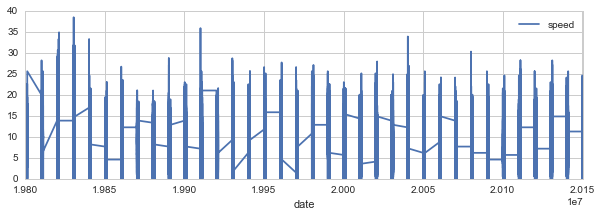

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


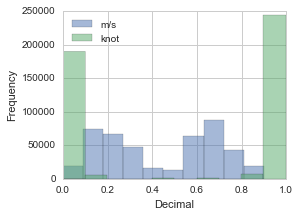

In [8]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal',ylabel='Frequency',legend={'loc':'best'})

print knot_unit

### 1.2.2 Sampling Type Selection

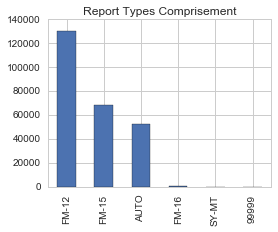

In [9]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

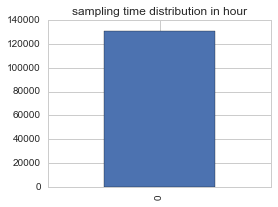

In [10]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution in hour', figsize=(4,3))

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [11]:
df['HrMn'].value_counts().sort_index()

0       12295
100     12311
200     12304
300     12371
400     12337
500     12311
600     12365
700     12117
800     11681
900     11194
1000    10716
1100    10715
1200    11060
1300    11287
1400    11561
1500    11973
1600    12119
1700    12204
1800    12334
1900    12285
2000    12294
2100    12395
2200    12322
2300    12323
Name: HrMn, dtype: int64

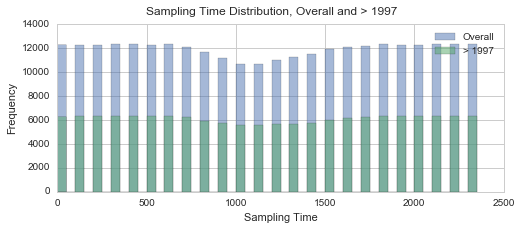

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [13]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  dir_windrose   decimal  \
184033  19910103   600  FM-12  200     70         N           250  0.978420   
317048  20040421  1100  FM-12  290     66         N           160  0.090730   
107869  19831018  1400  FM-12  210     61         N           240  0.036733   
160804  19890213  1500  FM-12  160     56         N           290  0.982736   
210235  19930121  2100  FM-12  180     56         N           270  0.982736   
430861  20111208  1400  FM-12  180     55         N           270  0.010814   
82329   19810227   400  FM-12  320     55         N           130  0.010814   
210077  19930117   500  FM-12  180     55         N           270  0.010814   
110610  19840121  1900  FM-12  310     54         N           140  0.038891   
430859  20111208  1200  FM-12  190     54         N           260  0.038891   

        incre  incre_reverse  
184033   44.0           46.0  
317048   33.0           32.0  
107869   31.0           24.0  
160804    6.0            6.0  
210235    8.0            6.0  
430861    3.0            6.0  
82329    19.0           22.0  
210077   12.0            3.0  
110610    4.0            2.0  
430859    2.0            2.0

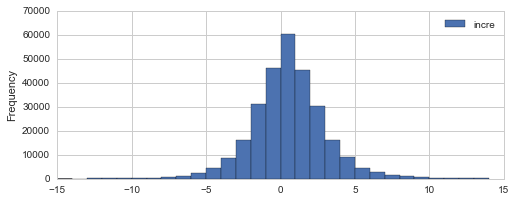

In [14]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [15]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 20


After Simple Aretefacts Handling

In [16]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  dir_windrose   decimal  \
210235  19930121  2100  FM-12  180     56         N           270  0.982736   
160804  19890213  1500  FM-12  160     56         N           290  0.982736   
430861  20111208  1400  FM-12  180     55         N           270  0.010814   
82329   19810227   400  FM-12  320     55         N           130  0.010814   
210077  19930117   500  FM-12  180     55         N           270  0.010814   
430859  20111208  1200  FM-12  190     54         N           260  0.038891   
110610  19840121  1900  FM-12  310     54         N           140  0.038891   
244228  19961106   500  FM-12  210     53         N           240  0.872584   
356123  20080109   500  FM-12  170     53         N           280  0.872584   
228654  19950117  2200  FM-12  290     52         N           160  0.900661   

        incre  incre_reverse  
210235    8.0            6.0  
160804    6.0            6.0  
430861    3.0            6.0  
82329    19.0           22.0  
210077   12.0            3.0  
430859    2.0            2.0  
110610    4.0            2.0  
244228   34.0            5.0  
356123   13.0           15.0  
228654    2.0            4.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

0       2699
10      2654
20      4002
30      4234
40      4329
50      3762
60      4960
70      6444
80      8233
90      8046
100     8282
110     6898
120     7279
130     6682
140     7703
150     8125
160     9878
170     9622
180    10488
190    10516
200    11582
210    10709
220    11447
230     9616
240     9666
250     9315
260    11398
270    10445
280    11494
290    10495
300    11684
310     9709
320     8390
330     5595
340     3994
350     2669
999     3807
Name: dir, dtype: int64

36 10.0


In [18]:
if len(effective_column) == 16:    
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

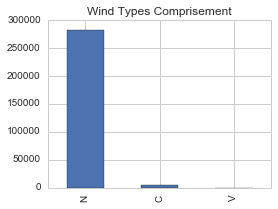

In [19]:
# Direction 999 handling
df['wind_type'].value_counts().plot(
    kind = 'bar', title = 'Wind Types Comprisement', figsize=(4,3))

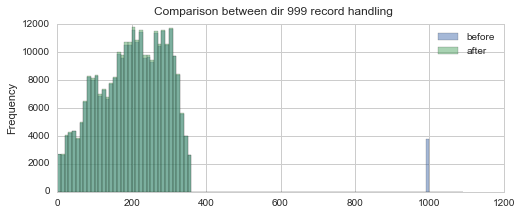

In [20]:
bins = arange(0, df.dir.max()+100,10)
df['dir'].plot(kind='hist', alpha=0.5, bins=bins, label='before')
df['dir'] = df.apply(lambda x: np.nan if x.dir == 999 else x.dir, axis=1)
df['dir'] = df['dir'].interpolate()//SECTOR_LENGTH*SECTOR_LENGTH
df['dir'].plot(kind='hist', alpha=0.5, bins=bins, label='after')
plt_configure(title='Comparison between dir 999 record handling', figsize=(8,3), legend={'loc':'best'})

### 1.3.3 Time Shift Comparison

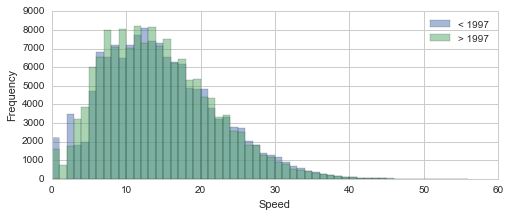

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

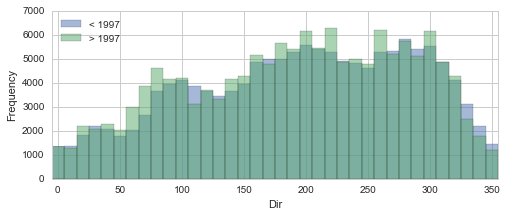

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1985 - 1989


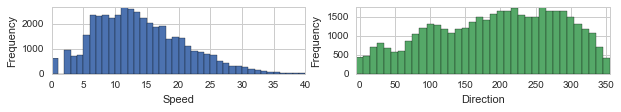

1990 - 1994


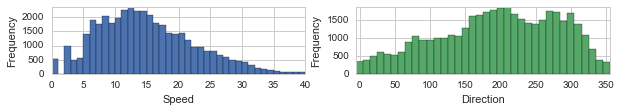

1995 - 1999


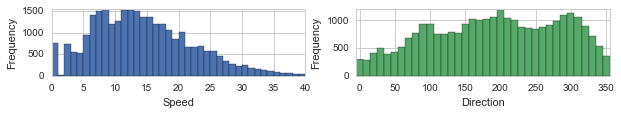

2000 - 2004


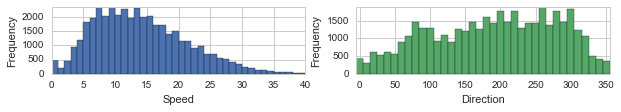

2005 - 2009


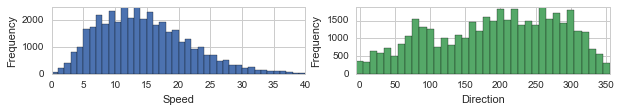

2010 - 2014


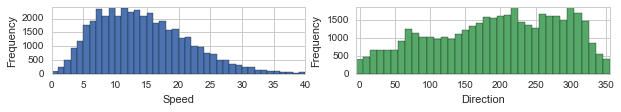

2015 - 2015


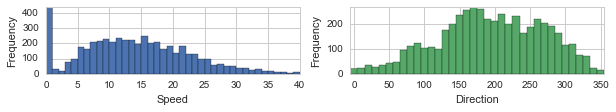

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [24]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print delete_zero, null_wind_frequency

False 0.00669335037503


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [25]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [26]:
contain_zero = not delete_zero
df, speed_redistribution_info = randomize_speed(df, contain_zero)

## 1.5 Generate (x,y) from (speed,dir)

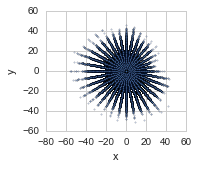

In [27]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
df.plot(kind='scatter', x='x', y='y', alpha=0.35, s=2, figsize=(2.5,2.5))
plt.gca().set_aspect('equal')

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [28]:
## Summery of the data selection
print 'Knot unit?', knot_unit
print 'Incre_threshold for artefact detection:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used
print 'delete_zero?', delete_zero
if 'speed_redistribution_info' in globals():
    print 'Speed redistribution info:', speed_redistribution_info 

df_all_years = df # for later across-year comparison
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: 0
delete_zero? False


date          HrMn           dir         speed  dir_windrose  \
count  4.285700e+04  42857.000000  42857.000000  42857.000000  42857.000000   
mean   2.012073e+07   1149.018830    193.654712     13.896633    191.368645   
std    1.413509e+04    693.169177     90.934478      7.302262    102.886477   
min    2.010010e+07      0.000000      0.000000      0.000000      0.000000   
25%    2.011040e+07    500.000000    120.000000      8.000000    130.000000   
50%    2.012070e+07   1100.000000    200.000000     13.000000    200.000000   
75%    2.013100e+07   1800.000000    270.000000     18.000000    270.000000   
max    2.014123e+07   2300.000000    350.000000     55.000000    999.000000   

            decimal         incre  incre_reverse             x             y  
count  42857.000000  42857.000000   42857.000000  42857.000000  42857.000000  
mean       0.546438      0.000280      -0.000303     -2.190496     -2.815906  
std        0.450145      2.536296       2.536282     10.296299     11.300543  
min        0.000000    -23.000000     -29.000000    -55.000000    -48.000000  
25%        0.051839     -1.000000      -1.000000     -8.999027    -10.724622  
50%        0.911451      0.000000       0.000000     -2.052121     -2.952019  
75%        0.967607      1.000000       1.000000      4.698463      5.196152  
max        0.997842     29.000000      23.000000     35.507042     37.422695

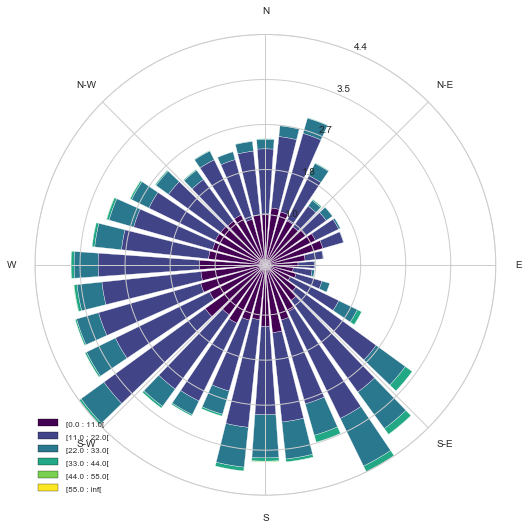

In [29]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [30]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARwAAADZCAYAAADypo9TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtcVHX+x/HXDJeRq6iFmSIiKppkrZfSsM2WvHX1AgVm
bi3VT6vf+rMsr6t2MdRsd1uTXe0ebVmmZVlpFlpppmJCgQKK3BRFBJS7DMP5/TEyYslVzjkz8Hk+
Hj4c5syZ72eAx5tz/X4MiqIoCCGEBox6FyCEaD8kcIQQmpHAEUJoRgJHCKEZCRwhhGYkcIQQmnFW
880VRWHJkiWkpqbi6urK0qVL8fPzsy2Pi4sjJiYGZ2dnJk+eTHh4OABr164lLi4Os9nMlClTmDx5
spplCiE0omrgfPPNN1RVVbFu3ToSExOJjo4mJiYGgOrqapYtW8bGjRsxmUxERkYSGhrKkSNHOHDg
AOvWraO8vJw333xTzRKFEBpSNXD279/PzTffDMB1111HUlKSbVl6ejr+/v54enoCMHToUPbu3cvB
gwfp168fjz32GGVlZTzzzDNqliiE0JCqgVNaWoqXl9eFwZydqampwWg0/m6Zu7s7paWlFBUVkZub
y5o1a8jJyWHGjBls2bJFzTKFEBpRNXA8PT0pKyuzfV0bNrXLSktLbcvKysrw9vbGx8eHwMBAnJ2d
CQgIwGQyUVhYSOfOnesdZ//+/ep9CCFEg4YMGdLk16oaOIMHD2b79u2MGzeOhIQE+vXrZ1sWGBhI
VlYWxcXFdOjQgfj4eKKionB1dSU2NpYHH3yQvLw8Kisr6dSpU6NjNedDt7b9+/e32/Hb82eX8Zv/
x17VwBk9ejS7du0iIiICgOjoaDZv3kxFRQXh4eHMmzePv/zlLyiKQlhYGL6+vvj6+hIfH09YWBiK
orB48WIMBoOaZQohNKJq4BgMBp599tmLngsICLA9HjVqFKNGjfrderNnz1azLCGETuTCPyGEZiRw
hBCakcARQmhGAkcIoRkJHCGEZlQ9SyVal8ViIT093fZ1YGAgTk5OOlYkRPNI4DiQ9PR0goIygAAg
g9RULrqYUgh7J4HjcAIACRnhmCRw2oi6u1uyqyXslQROG3FhdwvZ1RJ2SwLHDjV3a8WiWPjm2Dcw
6StwNrNorw8z3WYyvMdwuQ9N2BUJHDvUnK2VQ/mHuHfHvWSVZcEg63MfpsOH6R9ya69b+WDyB3T1
7KpF2UI0Sq7DsVsB5//VLz4/npA3Q8gqy2Jy78nw702wYjdv3/o24/qMY3vmdoasHULCyQRtShai
ERI4jsonh+nfTaekqoTF1y3mxRtfhLz+UN6ZEVeN4MspX7IsdBm5JbmMeWcMOw7swGKx6F21aOck
cByR0QxhT1FiLmHNnWu4y++u373EYDAwZ+Qc5g+eT35lPre+9hCJKYk6FCvEBRI4juiPL0CPRO7y
v4uHrn+owZdOC5oGe6ZC10xWHFihUYFCXJoEjqPxPgkhK6DYlyXDljTtLNTXc+BkEB+mf8i29G3q
1yhEPSRwHM2of4FLJWyfiaeLZ9PWsbjCpmicDE48/PnDlFWVNb6OECqQwHEgh88ehus/gVMDIWFi
va+zWCykpaWRlpZ24UDxiYH8pf9fyD6bzT9++odGFQtxMQkcB/JWyltgrIFvl4JS/8WA2dnZBAVl
EBSUQXZ2tu356QOnc6X7lSzftZy80jwtShbiIqoGTm3XhYiICKZNm0ZOTs5Fy+Pi4ggLCyMiIoL1
69fbnp80aRLTpk1j2rRpzJ8/X80SHUZ+WT6fZ34OBf6Q9vuzUr/3++t4PF08WXzLYkqrSnnuu+dU
qVOIhthdb/Ha1r/vvvuumqU5nLX711JVUwV7p4LS8r8Tjw55lH/u+Sev/fwaEd0j6OpuvQpZbvgU
WlB1C6epvcVdXFwYMmQI+/btIyUlhfLycqKionjwwQdJTJRrR8wWMzHxMXg4e0DCpMt6LxcnF+aN
nIe5xswf5/6DoCAICsq4aGIvIdSiauDU11v8Uss8PDwoKSnBzc2NqKgo3njjDZYsWcLs2bNt67RX
245uI7cklwkBE+BcE89MNWDqoKlc5X4VDP0K3DvR2C0UQrQWu+st7u/vT8+ePQHo1asXPj4+5Ofn
07Vrwzcg6t1fvDXHz8rKAoIBSEpKYm3BWgCurbn2otclJSVRUlJie1y7zuHDh6kNkbqP677+9o63
82b5m3DjKtg+9aJlzdWWvvcyvrrsrrf4hg0bSEtLY/HixeTl5VFWVsaVV17Z6Fh691duzfHrbvn1
CurF959+T5/OfZgwbAJzbUsseHh44OXlRVJSEgMGDLAt6du37yUfBwcH234Gf3X7K2++uwGG/ge+
v/eiZc1hD72tZXzpLQ60rLd4WFgY8+bNY8qUKRiNRl588UXbVlF7tC17GxXVFYy/evz5XcvaA7vZ
jBtX+yoPtmzJprFdo9rrcwBcDa7wcxiEvAHBXwIT1PkAQtRhd73FXVxcWLlypZplOZT1qdbLBVY9
+gfueP+3oVJ3fuOMRt8rO/tCSG3ZAuybAiPeghvfRVHuacWqhbi09rvp4AhMJSQUJ0DuQCgMaaU3
rXN9zpkekHo3XJ1MYoGcDRTqk8CxZ32/x6JYICVUvTH2PQbAR+kfqTeGEOdJ4NizoDjr/6kqBk5G
KBR158usLyk+V6zeOEIggWO/jGbo+x2+rr6QF6TeOIoRDoRRYalgXdI69cYRAgkc++UfDx1KGNF5
BKBy54UDkzEajLz282vqjiPaPQkce9VvOwA3drpR/bFKunJLt1uIz40n6VRS468XooUkcOxV4C6o
ciPYK1iT4SYEWK/DiU2M1WQ80T5J4NihvPI88D0CWcNwNbpqMuat3W/Fp4MP7/36HpYa6e4g1CGB
Y4d25+22Pjh6k2ZjmpxM3DfwPnJLconLiNNsXNG+SODYoV0nd1kfpGsXOAAPDHoAgHd/kbmIhDok
cOyMoijsPrkbSq+AU82/mfJy3OR3E7079eaTQ59Qbi7XdGzRPkjg2InaGyu/2PcF+ZX5cFSD0+G/
YTAYiBgYQZm5jLXfrb14EnYhWoEEjp1IT08nKCiDu/73K+sTGcN1qSPy2kgAZr2+XmYCFK1OAseu
BEDP83d9Zw3TpYJg32D6dewHffdBhy661CDaLgkcu6KAfzydXDpBYU/dqrjD/w5wNkN/6dIpWpcE
jj3pnA1e+VzrdS1aH7+p2zxvbI+x1icHfqVpDaLtk8CxJz3jAQj21ubq4rrqNs+jEOscPL13c+bc
Gc1rEW2XBI498T8fOBrdzvB7dSbnSh4HTtV8e/xbnWoRbZEEjj3xj4dKL/zd/fWuBA6OB+CrbNmt
Eq1H1TmNRcMsFovttHNeWZ71GM7hP+JksIMOmEV+kDuQ3YbdFFYU0tmts94ViTbALnuLAxQUFDBq
1CgyMhqfHNxR1V57ExSUwbcp53ddcq7Xt6i6ksdRrVSzKWWT3pWINkLVwKnbW/ypp54iOjratqy2
t/jbb79NbGwsH374IYWFhbZlixcvpkOHDmqWZyesx01SSlOsXx6zo8A5ZD1bteHQBp0LEW2F3fUW
B1i+fDmRkZH4+vqqWZ5dSS1NtT7IvbbhF2qp0J8gnyC2Hd0m8x2LVmF3vcU/+eQTunTpQkhICIqi
qFme/TBYrIGTHwiV3npXc5ExfmOoslSxOW2z3qWINsDueovHxlpnnNu1axcpKSnMmTOHf//733Tp
0vBl9nr3V27J+LYe4lemU1FTAceuA+rvDV738W81ZZ2G3qu+Zb0rewPw+o+vE1R16cncHfF7L+Pr
w256i+/bt4+oqCjGjBlje80DDzzAc88912jYgGP2Frdt4fU434TufODU1xu87uPfaso6Db1XfcvG
DxnPfwr/w0+

## 2.2 Create input data, i.e. speed_set

In [31]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
if 'params' not in globals():
    NUMBER_OF_GAUSSIAN = 3
    FIT_METHOD = 'square_error'
    KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [32]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13.
 -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.
   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.]


In [33]:
# plot_limit = ceil(df['speed'].quantile(.975))
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [34]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL = 'tophat'
# bandwidth = 1

In [35]:
# # The bandwidth value sometimes would be too radical
# from sklearn.grid_search import GridSearchCV

# if KDE_GRIDSEARCH == True:
#     if knot_unit:
#         bandwidth_range = arange(0.5,2,0.2)
#     else:
#         bandwidth_range = arange(0.4,1,0.1)

#     grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
#                         {'bandwidth': bandwidth_range},
#                         n_jobs=-1, cv=4) 
#     grid.fit(sample)
#     bandwidth = grid.best_params_['bandwidth']

In [36]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

bandwidth = 1.9
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.9 3025
[  3.07237119e-06   4.49248842e-06   6.96587300e-06   1.00747483e-05
   1.31003552e-05]


In [37]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXu0JGV9LvzUtau7921mYEBGBEQwMA6XGYxGlOACc5Tk
xAuOMiiQgDESjecI5lO8gSsLwRzPp1EcJUg+DRoFcrwd1KgcCCgSCagQLzAcQGacAYaZ2Ze+Vdf1
+6P6V/1W9VvVVdXVe7r2rmetvWbP7q6qt6urnvpdn5/guq6LEiVKlFilEA/2AkqUKFHiYKIkwRIl
SqxqlCRYokSJVY2SBEuUKLGqUZJgiRIlVjVKEixRosSqRkmCJUqUWNUoSbBEiRKrGiUJlihRYlWj
JMESJUqsapQkWKJEiVWNkgRLlCixqlGSYIkSJVY1ShIsUaLEqkZJgiVKlFjVKEmwRIkSqxolCZYo
UWJVoyTBEiVKrGqUJFiiRIlVjZIES5QosapRkmCJEiVWNUoSLFGixKpGSYIlSpRY1ShJsESJEqsa
JQmWKFFiVaMkwRIDcF0XjuPAdd2DvZQSJcYO+WAvoMRkwXEcWJYFXdchCIL/91qtBkmSDuLKSpQY
D0oSLOGj0+mg0WhA0zSIogjXddHpdGDbNhzHgSiKkGXZ/7ckxRIrASUJloDrurBtG6ZpwrZtdLtd
n/QcxwEA3yq0LAuu66Lb7UIURUiSVJJiiUJDcMvAz6oGub+O46Db7aLdbnPfJwgCJEnyf0SxH06m
S6gkxRJFREmCqxiWZcG2bQBAt9tFq9UCAEiShGq1Ctu2oes6N0FSkmKJlYKSBFchXNcNEGC73Ua3
2/Vfr1arkGU5EBOs1Wq+20w/LIgUKWZYkmKJoqCMCa4yOI4D0zR9Qms2m3AcB5IkoVKpxLrDRGJA
v4yGJUXLsmBZFoA+4dGPIAg++VJMkYi0Wq1CUZSSFEscFJQkuErAWnFEQkR4lUoFtVrNJ7AkYN1h
2n+YFIlwAT4pEmkKggDDMAKWoqqqgRKdEiXGhZIEVwHY5Ifrumi1WjBNE4IgoF6vQ1XVkY+RhRTZ
SAzPUmSJU1GUkhRLjAUlCa5wkJtKBNNqteA4DmRZxtTUVCB2R8gjTBxFihSLpNIbwKtPjHOfTdOE
ruslKZYYC0oSXKEIu7+6rqPT6QDwYnCapiUiEXqP67ojkQ6PFDudTqAecZj7XJJiiXGgJMEVCMMw
0Gg0oCgKFEVBs9mEZVkQRRH1eh2KohzsJfqJFsdxfEIOu84lKZZYDpQkuMJg2zYMw4BhGHBdF+12
G67rQlEU1Ot1rvtLOJikIQgCZFmGLHuXZLgcJy0pttttWJYFRVH87HNJiiV4KElwhYCt/aOYHhFG
rVZDpVIpFAmkJUVe4Ta9JgiCn2ihGkVZlgt1PkqMDyUJrgCwtX+O4/ilL4IgYHp62ieSpKD43yTV
0Q8jxXABNxEhm4BhiZPc8ZIUS5QkWHCwnR+GYfitbwCgqmpqAiwKkliKgBceaLVaXEuxJMUSQEmC
hQVbgwcArVYLhmEA8LK/lAleLQiTImkiUj1i2FIsSbEEoSTBAoKt/Qu3vk1NTfnlJ2mxkm5y+izU
Dhgu3C5JsQShJMECIa71TdM0VKtVv9SkRBBEYFQeNCop0vs1TYOmaX6GukTxUJJgQZCl9S2vzo+8
9rWcGLbeUUmRyFCSJD/+SK+RGERJisVASYIFAKk+A16sq9lswnXd2Na3UUC1dmyGuGgkSEhKRGlI
URAEf78UhhAEIbJsh2TDSlKcTJQkOMGwLAuGYfg3XafTga7rAOJb37LebER0PHda13X/ZqYbeiXf
1Cwpuq4bmX02DMO3CMPnhkiRElbh+Swr+fwVCSUJTigcx0Gj0YCu66jX6+h2u37r29TUVO6lL2Rh
AvBdbJLcJ1Jk9QLjlKVXGojUWFIk8qPsc9y5oe2JQEtSnCyUJDiBYGv/APi1f6qqolarJSacJC5s
OMEC9G9OwLOIKAFAv9P6eDf+arih2c9WqVQGynCizk34gcGSIr2nJMXlR0mCE4Sw7D3FloDxtL45
jhNIsNRqNbRarUgXO+wiplWWXqngWYpx5yYJKZIrrapqmX0eM0oSnBCwtX+O46DZbPpkWKvVoGla
4n0luVnI/WW1BQlJLMg8lKVXKpKcm2GkSKEIwHtYlZbi+FCS4EFGXO2fLMt+HDDP40XVF7J9tmnB
u/GHCR4UPfOcFFlIkafjSO8r3ed8UZLgQUS49q/dbvsXOCUm0sz9CCNMLmH3d2pqKqAtmOdNlETw
gNDpdAYsoZV8QychRfruDMOAZVlcKzqKFBVFWfHnME+UJHiQwNb+sa1vsiyjXq9DkiS/HCYPS4nn
/iaxMPMqluaRIilLs5lTAltjt9LLcXikSNlnXv1hVGihJMVsKElwmRFOfrCy96xrCmS3zNjtwtL6
4WMcLLDK0tVqFQAGLMVw5nSSynHooTCO88iSfqVS8btS0sZbS1JMhpIElxFh95dk73muKYusVhgl
WKLc3ygcjBjdsOLk1VqjCOSXhKLzSAKzNN+Fyq5WKymWJLhMYK0/tvUtiex9VpAbNa72unEhbcnJ
aso8A+mTUOHzQ9cBeQeUfAkXb68WlCQ4ZliWhUajAUmSoKpqoPVtWO1flpuZ3F9Cmslyox57XMhi
CRVV+IGQZt1Z57MQ+dG5Ymc+ryZSLElwjKC+UV3XoaoqdF2HbdupW9+S3hBs9hfwLnaKtyXBJBFf
HOJIkcINBJK9KqqlmGWtSUmRXmu329zzw5IiEedKJMWSBMcAnpIx9Yuqqop6vZ77jWiaZmCw+iil
NUUDS4qqqg7NruZRjlMkCzOKFMlj4FmKRHR0fiihtxJJsSTBnMEmPwAEFJ7r9ToqlUrifSW5OaMG
qy8sLKRceXCfRbrJw6B4ItCfs5JGKzANKRbJqiTQQwPwPrumaQOWIj206T3h87OSSLEkwRzBtr6x
tX+A1/2RhgBZRBFSXPFzEW/OcSFsCQ0TUJ0EybBxluCEkaSwfdhDg0eK9CBSFCVRVcLBQkmCOSBc
+8e2pVUqFT/QnBZx25imOTTDPIo1R9Zg0RMMPAwTUF3N5ThAvqRIk/5qtRruvfderF+/HieffPLB
+mhclCQ4IobJ3iuKgm63OzIhsb/z3N+81WUajQaA4PxelhRXEuJqFIkQw6Q4Sp/1JCCNpZnWkg4/
MIgU77vvPmzatCmSBF3XxVVXXYVHHnkEqqri6quvxpFHHum/fscdd2D79u2QZRnnnnsutm7dOnSb
a665Bs9//vPx5je/GQBw1113Yfv27QCAjRs34iMf+UhJgqMgXPvHJibGUZc3rPeXBV14afcPBJv2
6W+maQ70sK5EqyhpjSKh3W4PuM8rHWnns1iWhTvvvBOdTidWDen222+HYRj42te+hgcffBDXXHON
T1iWZeHaa6/F17/+dVQqFWzbtg1nnXUWHnjgAe42Bw4cwPve9z48+eSTeP7znw/A0+X8xCc+gZtu
uglzc3O48cYbMT8/X5JgFsS1vkVZZlksQXYfSdzfUUD7J0xPT/sBcsMwYhWUV7KKSVQ5jq7rvtVo
mmbukmHLGRMcFVGkSPfIjh078Dd/8zcAgO9+97v49re/jVe+8pV4wxveEPh8DzzwAF7xilcAAE4+
+WT88pe/9F977LHHcNRRR/mSb6eddhruu+8+/OIXvwhs86tf/QqA93D667/+a9x9993+Pn7+85/j
+OOPx7XXXotdu3Zh69atWLNmTUmCaUGlBHQDUOubKIq++xvGqBcytToB6dzfpMrSLIkDwd5V+ldR
FMiyHHgArMbODSJFsrRZtZ+owuRwuckkYJwkS6QoiiI6nQ5OOOEE/O3f/i2+9rWv4ZlnnsEPf/hD
/PCHP8Qf/ME

In [38]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [39]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [40]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

weight  mean_x   mean_y  sig_x  sig_y    corr
1  0.342  -0.214    5.257  7.361  8.802   0.165
2  0.337  -9.856   -3.338  8.945  9.644  -0.145
3  0.321   3.752  -10.874  9.348  9.109  -0.261

GMM Plot Result
0.342096146328 [[-0.21358085  5.25742428]] [ 7.07302363  9.03507357] 158.734925882
0.337012615037 [[-9.85561348 -3.33810847]] [  8.51164153  10.02894671] -148.756226943
0.320891238635 [[  3.75216122 -10.87429511]] [  7.92507407  10.37006741] -132.169052523


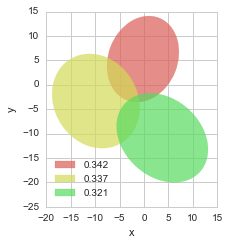

In [41]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [42]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmwZWV5Lv6scU9n6GaUWSUYFRlsICYIxgRMgfdWkgJa
uxHQYLyROPwCXK6SW9rttQyQa4xJCAE1xARTscVSIYQqTQcK0CLRxkCi5jYoCg3STN3nnL3XsNf0
/f5Y+137W99e495rnz67z3qquvqcvdd81nrWOz6vxBhjqFGjRo11CvlAH0CNGjVqHEjUJFijRo11
jZoEa9Sosa5Rk2CNGjXWNWoSrFGjxrpGTYI1atRY16hJsEaNGusaNQnWqFFjXaMmwRo1aqxr1CRY
o0aNdY2aBGvUqLGuUZNgjRo11jVqEqxRo8a6Rk2CNWrUWNeoSbBGjRrrGjUJ1qhRY12jJsEaNWqs
a9QkWKNGjXWNmgRr1KixrlGTYI0aNdY1ahKsUaPGukZNgjVq1FjXqEmwRo0a6xo1CdaoUWNdoybB
GjVqrGvUJFhjBIwxBEEAxtiBPpQaNaYO9UAfQI21hSAI4HkebNuGJEnR5+12G4qiHMAjq1FjOqhJ
sEYEy7LQ7XbRbDYhyzIYY7AsC77vIwgCyLIMVVWj/2tSrHEwoCbBGmCMwfd9uK4L3/fR7/cj0guC
AAAiq9DzPDDG0O/3IcsyFEWpSbHGTENideBnXYPc3yAI0O/3YZpm4nKSJEFRlOifLA/DyXQL1aRY
YxZRk+A6hud58H0fANDv92EYBgBAURS0Wi34vg/bthMTJDUp1jhYUJPgOgRjLEaApmmi3+9H37da
LaiqGosJttvtyG2mfzyIFClmWJNijVlBHRNcZwiCAK7rRoTW6/UQBAEURUGj0ch0h4nEgGEZDU+K
nufB8zwAQ8Kjf5IkReRLMUUi0larBU3TalKscUBQk+A6AW/FEQkR4TUaDbTb7YjAioB3h2n7IikS
4QLJpEikKUkSHMeJWYq6rsdKdGrUmBZqElwH4JMfjDEYhgHXdSFJEjqdDnRdn3gf45AiH4lJshR5
4tQ0rSbFGlNBTYIHOchNJYIxDANBEEBVVczNzcVid4QqwsRppEixSCq9AcL6xCz32XVd2LZdk2KN
qaAmwYMUovtr2zYsywIQxuCazWYhEqFlGGMTkU4SKVqWFatHzHOfa1KsMQ3UJHgQwnEcdLtdaJoG
TdPQ6/XgeR5kWUan04GmaQf6EKNESxAEESGLrnNNijVWAzUJHmTwfR+O48BxHDDGYJomGGPQNA2d
TifR/SUcSNKQJAmqqkJVw1tSLMcpS4qmacLzPGiaFmWfa1KskYSaBA8S8LV/FNMjwmi322g0GjNF
AmVJMalwm76TJClKtFCNoqqqM3U9akwPNQkeBOBr/4IgiEpfJEnC/Px8RCRFQfG/tVRHn0eKYgE3
ESGfgOGJk9zxmhRr1CQ44+A7PxzHiVrfAEDX9dIEOCsoYikCYXjAMIxES7EmxRpATYIzC74GDwAM
w4DjOADC7C9lgtcLRFIkTUSqRxQtxZoUaxBqEpxB8LV/Yuvb3NxcVH5SFgfTQ07nQu2AYuF2TYo1
CDUJzhCyWt+azSZarVZUalIjDiIwKg+alBRp+WaziWazGWWoa8weahKcEYzT+lZV50dV21pN5B3v
pKRIZKgoShR/pO9IDKImxdlATYIzAFJ9BsJYV6/XA2Mss/VtEjDGZo700lCUiMqQoiRJ0XYpDCFJ
UmrZDsmG1aS4NlGT4BqG53lwHCd66CzLgm3bALJb36p42NZaicxqgydFeikkZZ8dx4ksQr5wmydF
SliJ81lqUlwbqElwjSIIAnS7Xdi2jU6ng36/H7W+zc3NTaX0hXd9ydVez0RIIFLjSZHIj7LPvJai
qLpN6xOB1qS4tlCT4BoEX/sHIKr903Ud7Xa7sPs7LoFR65n4GRHBegdPVo1GY6QMRxSYTRtFwJMi
LVOT4uqjJsE1BFH2niei1Wh9IwuF4o30YNOxkHVYx7niSLIUs1S3i5AiudK6rtfZ5ymjJsE1Ar72
LwgC9Hq9iIDa7TaazWbhbZV9WEhogeaMKIqCdruNIAhg2zY8z4uRYp6M/npHEYHZPFKk6X9AGBqp
LcXpoSbBA4ys2j9VVaM44LRAxda+70cPH78/etCo7GMcGf31jnFIMUnHkZar3edqUZPgAYRY+2ea
ZnSDdzqd6PtxkRcT5MdsNhoNtFotLC0tZa6T9ECXUXepH9RipEh/O8dx4Hle4osljRQ1TauvdQnU
JHiAwNf+8a1vqqqi0+lAUZSoHKbqDK3o/nY6HTQajdT5wlnHUFbdhX+Y68xziCRSpOxzUv1hmrVd
k+J4qElwlSEmP3jZe771DRi/3i9rPd79pV7jKkddppEinXPSzGLXdSPR01l5UInAp3G8/HVoNBpR
V0rZEERNisVQk+AqQnR/SfZekiTMzc2lyt6PazGJ64nub7vdTnwQqrTQRFLkH2Zy9cXMs5g1Xe+o
YrwpMCRFEpil+C+VXa1XUqxJcJXAW39861sR2ftJkeb+HgjwnRiWZcH3/aishJIDYta0DvzHUTYu
K5Ii3WvkgVDyRSzeXi+oSXDK8DwP3W4XiqJA1/VY61te7d+k092A8d3f1SAcPvNMBcdZWdP1lHku
Y42PO5+FyI+uIz/zeT2RYk2CUwT1jdq2DV3XYdt2VIpSpvVtXPc0CAIsLy8DyHZ/CQeaVKpy+2hd
2uYsY5zjL0qK9J1pmonXkSdFutYHIynWJDgFJCkZUzeGruvodDpTfThFFZgD6f5OgknKcaadeZ6l
zHYaKZJHkmQpEtFRrJDCFQcjKdYkWDH45AeAmMJzWTIahyjJ/SUsLi6WvkHXqpRW2XIcAFGx+bQC
/7NoadLLBQhfHM1mc+TlQi9tWkas9TyYSLEmwQrBt77xtX9A2P0xrjVWlJD47C8Qv9kPRuSV49Dv
9CKih5NXdlmrWE13fpJazyxSpASMpmmplQ9rATUJVgCx9o9vfWs0GlGguSyKrpOU/bUsa90pS/MP
s+u66Pf70YNdVMSgRrWkSJP+2u02Hn74YRxxxBE47bTTDtSpJaL+y08IfuYE1f6ZphnV/rXbbQCT
kUjWur7vY2VlBf1+H4qiYHFxcaL431q2jsYBuXvtdjvKxpMYBNXMmaYJwzAisYhZIPxJUcbSJFKk
5Bp/HUkn0XEcWJYFwzBgWRYcx4kpcTPG8N3vfhdPPfVU5jFt27YNW7ZswRVXXIE9e/bEvr/vvvtw
ySWXYMuWLbjzzjsLrXPDDTdgx44dI/t53/veF31eW4ITQKz9Mwwjan2bhuy9iKzi51oQNY6yclfr
qRynLMrOZ/E8D/fffz8sy8pUQ9q5cyccx8GXv/xlPPbYY7jhhhtwyy23RNu48cYb8bWvfQ2NRgNb
t27Feeedh0ceeSRxnX379uEjH/kInnrqKbz61a+O7eezn/0sut1u9HtNgmMgq/UtTfZ+HEJKe/Cm
XfzMK5ccrJi0HGe1ss+z8HdII0V6Rh5//HFcd911AIB7770Xd999N37t134NF110Uez8HnnkEZx7
7rkAgNNOOw0/+MEPou9+8pOf4IQTTsDc3BwA4Mwzz8R3v/tdPProo7F1fvjDHwIATNPEhz70ITz4
4IOxY/3mN78JWZZxzjnnDI+/6gtysIMyZ+T+drtdWJYFWZYxPz8f6/0lTHoj8w9cGfe3tgSLg0hR
13W0Wi10Oh00m82okJsI0bbtyOIHELVAzhqmSbJEiDQB8XWvex0++clP4uSTT0ar1cI///M/4w//
8A/x3HPPxdbr9XqYn5+PfldVNbrO4nftdhvdbheGYcQ+pz7rY489Fqeeemps+48//jjuuecefPjD
H459XluCBSH

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADZCAYAAAAQepQqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QVOfZ/7/LvvGyoLTGhB8kQigmElF5MbHVMHYMipOm
aoNGqJhJNFFn7GMUEKyJ4IwEE2PSVsTJ1E6NmCiJsWObZtrIk3SZRJ+JrAVfCDZRFKQ8CupTdkFh
F87vD3KOy7J79pzdc86+XZ8ZJu7ZPee+l7Cfve7rvs99qRiGYUAQBCEzYb7uAEEQoQHJhiAIRSDZ
EAShCCQbgiAUgWRDEIQikGwIglAEja87QBCEdzAMg4qKCly8eBE6nQ6VlZV48MEHuec///xz1NTU
QKPR4Nlnn8XSpUvdnlNVVYWHH34Yzz33HACgsrISZ86cQVRUFACgpqYGWq0WJSUluHnzJgwGA3bu
3InY2FjejhIEEcB89tlnTFlZGcMwDNPU1MSsW7eOe85qtTI5OTmM2WxmBgcHmWeffZa5efOmy3Nu
3rzJrF69msnJyWGOHDnCXSc/P5+5ffv2qHb/+Mc/Mnv27GEYhmH++te/Mjt27ODtJw2jCCLAMZlM
ePLJJwEA06dPx/nz57nnLl26hEmTJsFgMECr1SIrKwtff/31mHMuXLgAAOjv78evfvUr/PznP+eu
wTAMrl69im3btiE/Px8ff/wx1252djYAIDs7G6dOneLtJw2jCCLAsVgsiI6O5h5rNBoMDw8jLCxs
zHORkZEwm83o6+sbdVytVmN4eBgJCQlISEhAQ0MD91x/fz8KCwvxwgsvwGaz4fnnn8fUqVNhsVhg
MBgAAFFRUbBYLLz9DFjZmEwmX3eBIHjJzMwU9LozTZ+DGRrn8nmdToe0tDSXzxsMBvT19XGPWdGw
z9lLoK+vD+PGjeM9x5GIiAgUFhZCr9dDr9fjiSeeQGtrK6Kjo7lrOMrLGQErGwD4cNf/SH5Ns9ns
9pcmF9R28LS9rGSW4NcyQ+MQEf+Wy+fvdBbznp+RkYEvvvgCubm5aGpqwuTJk7nnkpOTcfXqVfT2
9iI8PByNjY1YtWoVALg8x5G2tjZs3LgRx48fh81mg8lkwi9+8Qvcvn0bRqMRaWlpMBqNyMrK4u1n
QMuGIAggJycHX331FZYvXw5gZCbpk08+wZ07d7B06VJs2bIFL774IhiGQV5eHiZOnOj0HFckJydj
8eLFWLp0KbRaLZYsWYLk5GTEx8ejtLQUBQUF0Ol02L17N28/VQwTmHd9m0wmimyobb9te1nJLMHD
KJPJ5DayEXotf4ZmowiCUASSDUEQikCyIQhCEUg2BEEoAsmGIAhFINkQBKEIJBuCIBSBZEMQhCKQ
bAiCUASSDUEQikCyIQhCEUg2BEEoAsmGIAhFINkQBKEIiu9nY7PZ8Otf/xqdnZ2wWq1Yu3YtfvSj
H6GsrAxhYWFISUlBeXm50t0iCEJmFJfNn//8Z8TGxuLNN99Eb28vFi1ahEcffRSbNm1CVlYWysvL
UV9fj6eeekrprhEEISOKD6MWLlyIDRs2AACGhoagVqvR0tLCbSkoZJd2giACD8VlExERgcjISFgs
FmzYsAEbN26E/WaBUVFRMJvNSneLIAiZ8ckexF1dXVi/fj1WrFiBp59+Grt27eKe6+vrQ0xMjKDr
yCUlX8qO2g6ttkMJxWXT09ODVatWYdu2bZg1a2QH+ilTpuD06dOYOXMmGhoauOPukGPv2GDcD5fa
9s+2Qw3FZfPuu++it7cXNTU12Lt3L1QqFbZu3YodO3bAarUiOTkZubm5SneLIAIWRoFa3wcOHMCn
n34KlUqFJ598EuvXrwcwkmNNTEwEAKSnp2Pjxo0u+6m4bLZu3YqtW7eOOV5bW6t0VwgiKKivr8fg
4CCOHDmC5uZmVFVVoaamBsDIUpOdO3fi2LFj0Ov1yM/Px7x582AymZyec+vWLZSWluLq1at4+OGH
AQAdHR345JNPcPToUQBAfn4+5s+fj/DwcDz22GPYt2+foH5S3ShiDOdsA5JdK02jl+xahHOE1voG
wNX6bmpq4q31bV9+Ny4uDvv37+ce22w26PV6nD9/HtevX8fKlSsRERGBsrIyJCUluewnySYEcSaT
IW0Y1N8fT06Nl6SdSy2dOGcbIOHIjNy1vjUaDcaPHw8AeOONN5CamopJkyahu7sba9aswYIFC2Ay
mVBSUsJFP84g2QQxfBGKo1DkSJQmp8aTcATS3t/u8rn73Jwrd61vABgcHMSWLVsQHR2NiooKAMDU
qVOhVqsBjNQ17+7u5u0nySYIcCUVqSIUbyDhCOOfA4tcPjffzbly1/oGgHXr1uHHP/4xVq9ezR2r
rq7G+PHjsXr1arS2tiIuLo73GiSbAMVRMP4gFlewwiHkQe5a3/X19WhsbITVaoXRaIRKpUJRURHW
rFmD4uJiGI1GaDQa3msAVOt7DP685kNOwcj9vlnZOItu/Pl37ilia31/FvnfLp+f3z8vKGp9U2QT
IJyTOHmrNBTdECQbPyfQJeMI5W5CF9o8y085ZxsIOtEEy/sgPIMiGz/E15IxMT0un8tUTVCwJ0Qw
QbLxM5QUjb1UbOFD0DAjbackTXR9TtuNUY9JPoRQSDZ+xCVtGNSQTzSOEYu9VITOyjiKiJWPUOkk
p8bjXEsn5W1CEJKNnyBXRGMvGL6IxVNSkibi27YbMDE9FOUQvJBs/ABWNHFJP5DkenILxhESDiEE
mo3yMVJGNCamhxNNStJERUTDwrbFl1wmQhuKbHyIVKKxF4wvYSMcgnAGycYHBJtkHKHhFOEMGkYp
jBSicRwu+RNC+pOcGi/pBl1EYECRjYJIJRpAHsk0a13fuzTdSqt/Ce8g2SiAPw6bHMUyFGODGhpM
iRu7VdM3Xd2jXi9EPDSUIhwh2ciMP0Uz9sJwlArfoj7717Li4RMOJYoJZ5BsZMJfohk+wXjClLj7
BAlHCHQHeGhBCWKJkfJubW9E06zt5EQzJe4+SUTDwl6LL8fjDroDPPTwmWyam5tRWFgIAGhvb0dB
QQFWrFiB7du3+6pLXmMvGV+JRk7J2CPXdYngxSey2b9/P1599VVYrVYAI/ufbtq0CYcOHcLw8DDq
6+t90S2PYaMZqSRjYno8WgGshGRctelIStJEQauJaQo8dPCJbCZNmoS9e/dyjy9cuICsrCwAI+U8
T5065YtuiUZqybSE9wPwPJpRUjKA99ENDaVCC58kiHNyctDZee8b0X7P9aioKJjNZl90SzD238ZS
3dMEAAkPGERtvi118tdXXNKGYYavOxHAKFHr+8MPP0RdXR20Wi3Wrl2LuXPnYmBgACUlJbh58yYM
BgN27tyJ2NhYl/30i9ko++JYfX19iImJEXSeXFLiu+4l7Uhf2Tu0vekDG8kAI6IRc71vY24BNmDS
eHHn8eHJNRIM4Tjzf1eR0jv2jnWbbQjmu/zXnPhgDLrabvn0C8bfv9zcIXet756eHtTW1uJPf/oT
7t69i/z8fMyePRuHDx/G5MmTsX79enz66aeoqanB1q1bXfbTL2STmpqK06dPY+bMmWhoaMCsWbME
nSdHCQ6+9SbnbAOSbW5lYnqggdqjDayatZ0uF+B5itlsRuz933KPbf0Zgs9VW+467feU6Gj8q+2G
28V9XbiFKxE6n0yD+7KMjFTIXev77NmzyMzMhEajgcFgQGJiIlpbW2EymfDSSy8BGEl/sIJzhV/I
prS0FK+99hqsViuSk5ORm5vr6y6NwV+mswFphkyayDOjHsfoh5Aa+/8AAC23r496Xox4PCEu6Qe4
0dFL6248RO5a386uYbFY0NfXx0ksKipqVJlfZ/hMNvHx8Thy5AgAIDExEbW1tb7qiluCRTSOgkmN
vZ/7t/1Qwv4

## Goodness-of-fit Statistics

In [43]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.020  2.667435e-09      0.037       0.161

# 5. GMM by Optimization

In [44]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print FIT_METHOD

square_error


In [45]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -20.180120306388925
     jac: array([ -6.51329517e-01,   0.00000000e+00,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,   1.66893005e-06,
        -6.51329041e-01,   4.76837158e-07,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.66893005e-06,
        -6.51326418e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2023
     nit: 100
    njev: 100
  status: 0
 success: True
       x: array([  0.57904241,  -4.69506964,  -7.34461742,  11.95652736,
        10.02417882,  -0.38449647,   0.36598184,  -0.59450287,
         5.69831908,   7.65029468,   8.07122511,   0.15105269,
         0.05497575,   8.2662365 , -10.68274354,   7.61096536,
         4.49808299,  -0.67369787])

## 5.1 GMM Result

In [46]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.579  -4.695   -7.345  11.957  10.024  -0.384
2  0.366  -0.595    5.698   7.650   8.071   0.151
3  0.055   8.266  -10.683   7.611   4.498  -0.674

GMM Plot Result
0.579042410691 [[-4.69506964 -7.34461742]] [  8.42494543  13.13251697] -122.628911801
0.3659818398 [[-0.59450287  5.69831908]] [ 7.20688758  8.46950145] 144.766202753
0.0549757495095 [[  8.2662365  -10.68274354]] [ 3.04871474  8.29848678] -115.372735273


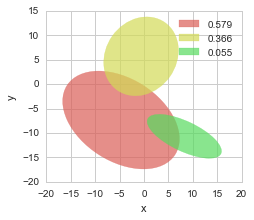

In [47]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [48]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.006      0.018  1.721413e-09      0.029       0.129

In [49]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWm0LWV5LvpUO7vV7E0rnRgNJoB0G0gcAsYEzEHuueoR
UDYR9OrxKLE5R7gcJTnKzjCKjmESRyREjPGS4D1xi1Eh6DgaAgPQQVQw6FFzAUFgixtp9l5rzaZq
VvfdHzXfb371zepnzbXW3KsexhrstWb1s+qpt31ehTHGUKNGjRpbFOpGH0CNGjVqbCRqEqxRo8aW
Rk2CNWrU2NKoSbBGjRpbGjUJ1qhRY0ujJsEaNWpsadQkWKNGjS2NmgRr1KixpVGTYI0aNbY0ahKs
UaPGlkZNgjVq1NjSqEmwRo0aWxo1CdaoUWNLoybBGjVqbGnUJFijRo0tjZoEa9SosaVRk2CNGjW2
NGoSrFGjxpZGTYI1atTY0qhJsEaNGlsaNQnWqFFjS6MmwRo1amxp1CRYo0aNLY2aBGvUqLGlUZNg
jRo1tjRqEqwxAcYYgiAAY2yjD6VGjZlD3+gDqLG5EAQBPM+DbdtQFIX/vd1uQ9O0DTyyGjVmg5oE
a3BYloVut4tmswlVVcEYg2VZ8H0fQRBAVVXous7/X5NijQMBNQnWAGMMvu/DdV34vo/hcMhJLwgC
AOBWoed5YIxhOBxCVVVomlaTYo25hsLqwM+WBrm/QRBgOBxiMBjELqcoCjRN4z+qOg4n0y1Uk2KN
eURNglsYnufB930AwHA4RL/fBwBomoZWqwXf92HbdmyCpCbFGgcKahLcgmCMRQhwMBhgOBzyz1ut
FnRdj8QE2+02d5vpRwSRIsUMa1KsMS+oY4JbDEEQwHVdTmi9Xg9BEEDTNDQajVR3mEgMGJfRiKTo
eR48zwMwJjz6URSFky/FFIlIW60WDMOoSbHGhqAmwS0C0YojEiLCazQaaLfbnMDyQHSHafsyKRLh
AvGkSKSpKAocx4lYiqZpRkp0atSYFWoS3AIQkx+MMfT7fbiuC0VR0Ol0YJrm1PsoQ4piJCbOUhSJ
0zCMmhRrzAQ1CR7gIDeVCKbf7yMIAui6joWFhUjsjlBFmDiJFCkWSaU3QFifmOY+u64L27ZrUqwx
E9QkeIBCdn9t24ZlWQDCGFyz2cxFIrQMY2wq0okjRcuyIvWIWe5zTYo1ZoGaBA9AOI6DbrcLwzBg
GAZ6vR48z4Oqquh0OjAMY6MPkSdagiDghCy7zjUp1lgP1CR4gMH3fTiOA8dxwBjDYDAAYwyGYaDT
6cS6v4SNJA1FUaDrOnQ9vCXlcpyipDgYDOB5HgzD4NnnmhRrxKEmwQMEYu0fxfSIMNrtNhqNxlyR
QFFSjCvcps8UReGJFqpR1HV9rq5HjdmhJsEDAGLtXxAEvPRFURQsLi5yIskLiv9tpjr6LFKUC7iJ
CMUEjEic5I7XpFijJsE5h9j54TgOb30DANM0CxPgvCCPpQiE4YF+vx9rKdakWAOoSXBuIdbgAUC/
34fjOADC7C9lgrcKZFIkTUSqR5QtxZoUaxBqEpxDiLV/cuvbwsICLz8pigPpIadzoXZAuXC7JsUa
hJoE5whprW/NZhOtVouXmtSIggiMyoOmJUVavtlsotls8gx1jflDTYJzgjKtb1V1flS1rfVE1vFO
S4pEhpqm8fgjfUZiEDUpzgdqEpwDkOozEMa6er0eGGOprW/TgDE2d6SXhLxEVIQUFUXh26UwhKIo
iWU7JBtWk+LmRE2Cmxie58FxHP7QWZYF27YBpLe+VfGwbbYSmfWGSIr0UojLPjuOwy1CsXBbJEVK
WMnzWWpS3ByoSXCTIggCdLtd2LaNTqeD4XDIW98WFhZmUvoiur7kam9lIiQQqYmkSORH2WdRS1FW
3ab1iUBrUtxcqElwE0Ks/QPAa/9M00S73c7t/pYlMGo9k/9GRLDVIZJVo9GYKMORBWaTRhGIpEjL
1KS4/qhJcBNBlr0XiWg9Wt/IQqF4Iz3YdCxkHdZxrijiLMU01e08pEiutGmadfZ5xqhJcJNArP0L
ggC9Xo8TULvdRrPZzL2tog8LCS3QnBFN09ButxEEAWzbhud5EVLMktHf6sgjMJtFijT9DwhDI7Wl
ODvUJLjBSKv903WdxwFnBSq29n2fP3zi/uhBo7KPMjL6Wx1lSDFOx5GWq93nalGT4AZCrv0bDAb8
Bu90OvzzssiKCYpjNhuNBlqtFlZWVlLXiXugi6i71A9qPlKk785xHHieF/tiSSJFwzDqa10ANQlu
EMTaP7H1Tdd1dDodaJrGy2GqztDK7m+n00Gj0UicL5x2DEXVXcSHuc48h4gjRco+x9UfJlnbNSmW
Q02C6ww5+SHK3outb0D5er+09UT3l3qNqxx1mUSKdM5xM4td1+Wip/PyoBKBz+J4xevQaDR4V0rR
EERNivlQk+A6QnZ/SfZeURQsLCwkyt6XtZjk9WT3t91uxz4IVVpoMimKDzO5+nLmWc6abnVUMd4U
GJMiCcxS/JfKrrYqKdYkuE4QrT+x9S2P7P20SHJ/NwJiJ4ZlWfB9n5eVUHJAzprWgf8oisZlZVKk
e408EEq+yMXbWwU1Cc4Ynueh2+1C0zSYphlpfcuq/Zt2uhtQ3v1dD8IRM89UcJyWNd1Kmeci1njZ
+SxEfnQdxZnPW4kUaxKcIahv1LZtmKYJ27Z5KUqR1rey7mkQBFhdXQWQ7v4SNppUqnL7aF3a5jyj
zPHnJUX6bDAYxF5HkRTpWh+IpFiT4AwQp2RM3RimaaLT6cz04ZRVYDbS/Z0G05TjzDrzPE+Z7SRS
JI8kzlIkoqNYIYUrDkRSrEmwYojJDwARheeiZFSGKMn9JSwvLxe+QTerlFbRchwAvNh8VoH/ebQ0
6eUChC+OZrM58XKhlzYtI9d6HkikWJNghRBb38TaPyDs/ihrjeUlJDH7C0Rv9gMRWeU49Du9iOjh
FJVdNivW052fptYzjRQpAWMYRmLlw2ZATYIVQK79E1vfGo0GDzQXRd514rK/lmVtOWVp8WF2XRfD
4ZA/2HlFDGpUS4o06a/dbuO+++7DYYcdhlNOOWWjTi0W9Tc/JcSZE1T7NxgMeO1fu90GMB2JpK3r
+z7W1tYwHA6haRqWl5eniv9tZuuoDMjda7fbPBtPYhBUMzcYDNDv97lYxDwQ/rQoYmkSKVJyTbyO
pJPoOA4sy0K/34dlWXAcJ6LEzRjD9773PTzxxBOpx3TttdfikksuweWXX449e/ZEPr/zzjtx0UUX
4ZJLLsEtt9ySa53rrrsOu3fvntjPO97xDv732hKcAnLtX7/f561vs5C9l5FW/FwLokZRVO5qK5Xj
FEXR+Sye5+Guu+6CZVmpakh33HEHHMfBF7/4Rfzwhz/EddddhxtuuIFv4+Mf/zi+8pWvoNFoYOfO
nTj33HPxwAMPxK6zb98+fOADH8ATTzyBF7/4xZH9fOpTn0K32+W/1yRYAmmtb0my92UIKenBm3Xx
s6hccqBi2nKc9co+z8P3kESK9Iw8/PDDuPrqqwEA3/jGN3Dbbbfhd3/3d/GGN7whcn4PPPAAzjnn
HADAKaecgh//+Mf8s0cffRTHHnssFhYWAABnnHEGvve97+HBBx+MrPOTn/wEADAYDPDe974X99xz
T+RYv/nNb0JVVZx99tnj46/6ghzooMwZub/dbheWZUFVVSwuLkZ6fwnT3sjiA1fE/a0twfwgUjRN
E61WC51OB81mkxdyEyHats0tfgC8BXLeMEuSJUKkCYjHH388PvKRj+DEE09Eq9XCP//zP+OP/uiP
sHfv3sh6vV4Pi4uL/Hdd1/l1lj9rt9vodrvo9/uRv1Of9dFHH42TTz45sv2HH34Yt99+O973vvdF
/l5bgjkh1/6

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADZCAYAAAAQepQqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QVOfZ/7/LvvGyoLTGhB8kQigmElF5MbHVMHYMipOm
aoNGqJhJNFFn7GMUEKyJ4IwEE2PSVsTJ1E6NmCiJsWObZtrIk3SZRJ+JrAVfCDZRFKQ8CupTdkFh
F87vD3KOy7J79pzdc86+XZ8ZJu7ZPee+l7Cfve7rvs99qRiGYUAQBCEzYb7uAEEQoQHJhiAIRSDZ
EAShCCQbgiAUgWRDEIQikGwIglAEja87QBCEdzAMg4qKCly8eBE6nQ6VlZV48MEHuec///xz1NTU
QKPR4Nlnn8XSpUvdnlNVVYWHH34Yzz33HACgsrISZ86cQVRUFACgpqYGWq0WJSUluHnzJgwGA3bu
3InY2FjejhIEEcB89tlnTFlZGcMwDNPU1MSsW7eOe85qtTI5OTmM2WxmBgcHmWeffZa5efOmy3Nu
3rzJrF69msnJyWGOHDnCXSc/P5+5ffv2qHb/+Mc/Mnv27GEYhmH++te/Mjt27ODtJw2jCCLAMZlM
ePLJJwEA06dPx/nz57nnLl26hEmTJsFgMECr1SIrKwtff/31mHMuXLgAAOjv78evfvUr/PznP+eu
wTAMrl69im3btiE/Px8ff/wx1252djYAIDs7G6dOneLtJw2jCCLAsVgsiI6O5h5rNBoMDw8jLCxs
zHORkZEwm83o6+sbdVytVmN4eBgJCQlISEhAQ0MD91x/fz8KCwvxwgsvwGaz4fnnn8fUqVNhsVhg
MBgAAFFRUbBYLLz9DFjZmEwmX3eBIHjJzMwU9LozTZ+DGRrn8nmdToe0tDSXzxsMBvT19XGPWdGw
z9lLoK+vD+PGjeM9x5GIiAgUFhZCr9dDr9fjiSeeQGtrK6Kjo7lrOMrLGQErGwD4cNf/SH5Ns9ns
9pcmF9R28LS9rGSW4NcyQ+MQEf+Wy+fvdBbznp+RkYEvvvgCubm5aGpqwuTJk7nnkpOTcfXqVfT2
9iI8PByNjY1YtWoVALg8x5G2tjZs3LgRx48fh81mg8lkwi9+8Qvcvn0bRqMRaWlpMBqNyMrK4u1n
QMuGIAggJycHX331FZYvXw5gZCbpk08+wZ07d7B06VJs2bIFL774IhiGQV5eHiZOnOj0HFckJydj
8eLFWLp0KbRaLZYsWYLk5GTEx8ejtLQUBQUF0Ol02L17N28/VQwTmHd9m0wmimyobb9te1nJLMHD
KJPJ5DayEXotf4ZmowiCUASSDUEQikCyIQhCEUg2BEEoAsmGIAhFINkQBKEIJBuCIBSBZEMQhCKQ
bAiCUASSDUEQikCyIQhCEUg2BEEoAsmGIAhFINkQBKEIiu9nY7PZ8Otf/xqdnZ2wWq1Yu3YtfvSj
H6GsrAxhYWFISUlBeXm50t0iCEJmFJfNn//8Z8TGxuLNN99Eb28vFi1ahEcffRSbNm1CVlYWysvL
UV9fj6eeekrprhEEISOKD6MWLlyIDRs2AACGhoagVqvR0tLCbSkoZJd2giACD8VlExERgcjISFgs
FmzYsAEbN26E/WaBUVFRMJvNSneLIAiZ8ckexF1dXVi/fj1WrFiBp59+Grt27eKe6+vrQ0xMjKDr
yCUlX8qO2g6ttkMJxWXT09ODVatWYdu2bZg1a2QH+ilTpuD06dOYOXMmGhoauOPukGPv2GDcD5fa
9s+2Qw3FZfPuu++it7cXNTU12Lt3L1QqFbZu3YodO3bAarUiOTkZubm5SneLIAIWRoFa3wcOHMCn
n34KlUqFJ598EuvXrwcwkmNNTEwEAKSnp2Pjxo0u+6m4bLZu3YqtW7eOOV5bW6t0VwgiKKivr8fg
4CCOHDmC5uZmVFVVoaamBsDIUpOdO3fi2LFj0Ov1yM/Px7x582AymZyec+vWLZSWluLq1at4+OGH
AQAdHR345JNPcPToUQBAfn4+5s+fj/DwcDz22GPYt2+foH5S3ShiDOdsA5JdK02jl+xahHOE1voG
wNX6bmpq4q31bV9+Ny4uDvv37+ce22w26PV6nD9/HtevX8fKlSsRERGBsrIyJCUluewnySYEcSaT
IW0Y1N8fT06Nl6SdSy2dOGcbIOHIjNy1vjUaDcaPHw8AeOONN5CamopJkyahu7sba9aswYIFC2Ay
mVBSUsJFP84g2QQxfBGKo1DkSJQmp8aTcATS3t/u8rn73Jwrd61vABgcHMSWLVsQHR2NiooKAMDU
qVOhVqsBjNQ17+7u5u0nySYIcCUVqSIUbyDhCOOfA4tcPjffzbly1/oGgHXr1uHHP/4xVq9ezR2r
rq7G+PHjsXr1arS2tiIuLo73GiSbAMVRMP4gFlewwiHkQe5a3/X19WhsbITVaoXRaIRKpUJRURHW
rFmD4uJiGI1GaDQa3msAVOt7DP685kNOwcj9vlnZOItu/Pl37ilia31/FvnfLp+f3z8vKGp9U2QT
IJyTOHmrNBTdECQbPyfQJeMI5W5CF9o8y085ZxsIOtEEy/sgPIMiGz/E15IxMT0un8tUTVCwJ0Qw
QbLxM5QUjb1UbOFD0DAjbackTXR9TtuNUY9JPoRQSDZ+xCVtGNSQTzSOEYu9VITOyjiKiJWPUOkk
p8bjXEsn5W1CEJKNnyBXRGMvGL6IxVNSkibi27YbMDE9FOUQvJBs/ABWNHFJP5DkenILxhESDiEE
mo3yMVJGNCamhxNNStJERUTDwrbFl1wmQhuKbHyIVKKxF4wvYSMcgnAGycYHBJtkHKHhFOEMGkYp
jBSicRwu+RNC+pOcGi/pBl1EYECRjYJIJRpAHsk0a13fuzTdSqt/Ce8g2SiAPw6bHMUyFGODGhpM
iRu7VdM3Xd2jXi9EPDSUIhwh2ciMP0Uz9sJwlArfoj7717Li4RMOJYoJZ5BsZMJfohk+wXjClLj7
BAlHCHQHeGhBCWKJkfJubW9E06zt5EQzJe4+SUTDwl6LL8fjDroDPPTwmWyam5tRWFgIAGhvb0dB
QQFWrFiB7du3+6pLXmMvGV+JRk7J2CPXdYngxSey2b9/P1599VVYrVYAI/ufbtq0CYcOHcLw8DDq
6+t90S2PYaMZqSRjYno8WgGshGRctelIStJEQauJaQo8dPCJbCZNmoS9e/dyjy9cuICsrCwAI+U8
T5065YtuiUZqybSE9wPwPJpRUjKA99ENDaVCC58kiHNyctDZee8b0X7P9aioKJjNZl90SzD238ZS
3dMEAAkPGERtvi118tdXXNKGYYavOxHAKFHr+8MPP0RdXR20Wi3Wrl2LuXPnYmBgACUlJbh58yYM
BgN27tyJ2NhYl/30i9ko++JYfX19iImJEXSeXFLiu+4l7Uhf2Tu0vekDG8kAI6IRc71vY24BNmDS
eHHn8eHJNRIM4Tjzf1eR0jv2jnWbbQjmu/zXnPhgDLrabvn0C8bfv9zcIXet756eHtTW1uJPf/oT
7t69i/z8fMyePRuHDx/G5MmTsX79enz66aeoqanB1q1bXfbTL2STmpqK06dPY+bMmWhoaMCsWbME
nSdHCQ6+9SbnbAOSbW5lYnqggdqjDayatZ0uF+B5itlsRuz933KPbf0Zgs9VW+467feU6Gj8q+2G
28V9XbiFKxE6n0yD+7KMjFTIXev77NmzyMzMhEajgcFgQGJiIlpbW2EymfDSSy8BGEl/sIJzhV/I
prS0FK+99hqsViuSk5ORm5vr6y6NwV+mswFphkyayDOjHsfoh5Aa+/8AAC23r496Xox4PCEu6Qe4
0dFL6248RO5a386uYbFY0NfXx0ksKipqVJlfZ/hMNvHx8Thy5AgAIDExEbW1tb7qiluCRTSOgkmN
vZ/7t/1Qwv4

In [50]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

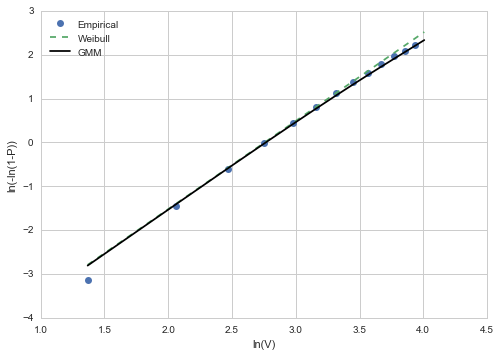

In [51]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


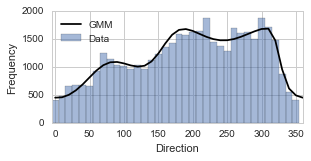

In [52]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print title

Speed Distribution Comparison


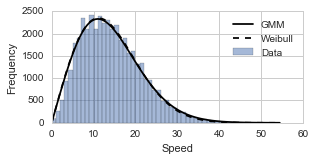

In [53]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print title

In [54]:
incre = SECTOR_LENGTH 
density_collection =[]
for angle in arange(0, 360, incre):
    angle_radian, incre_radian = radians(angle), radians(incre)  
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
    data_size = len(sub_df.speed)    
        
    bins = arange(0, sub_df.speed.max()+1)

    density_, division = np.histogram(sub_df['speed'],bins=bins)
    density = density_/len(df)
    density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                        for x_ in bins[:-1]]
    density_expected = array(zip(*density_expected_ )[0])
    fig = plt.figure(figsize=(1.5,1.5))
    plot(bins[1:], density)
    plot(bins[1:], density_expected)
    
    curves = {'angle': angle, 'data_size': data_size, 
          'density': density, 'density_expected': density_expected}
    density_collection.append(curves)
    title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
    plt_configure(title = title)
align_figures()

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAJgAAAB6CAYAAABDTpqoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlAlNX+/1+zsW+K7LIo4EYKihqYC6WVS+XPBbfKTLLy
ey1LLeNaalZqi8uttGtly7Vuotes9N7SCFFTMyFBRUAFWWRfBYZltuf3x8gosg3KsM7rH515zjnP
5wyf56zv53NEgiAIGDFiIMTtbYCRro3RwYwYFKODGTEoRgczYlCMDmbEoBgdzIhBkbblzaKjo9m8
eTNKpZL+/fvzzjvvYGlpecfpADZt2kRQUBD33XdfvWsbN27k0KFD2NnZAdCnTx82b958V/drjEuX
LjF79my8vLx0323ZsqXOZ4Di4mJWrlxJdnY2YrGYdevWMXToUCorK1m6dCnbtm3DxMSkXvlPPvkk
2dnZ2NjYIAgCKpWKESNGsGLFihbb2qYIbURRUZEQHBwsZGRkCIIgCO+//76wdu3aO04nCIIQFxcn
LF68uNF7zp49Wzh79myr2NUcu3fvFt54441m0y1dulTYsWOHIAiCkJiYKIwZM0aorq4WBEEQfvjh
B2Hjxo0N5nviiSeEw4cP6z6rVCphzZo1wnPPPddiW9uSNusiT5w4wZAhQ3B3dwdg7ty5HDhw4I7T
AXz00UfMnj27wWsKhYKLFy/yxRdfMHXqVF588UVycnLu6n5NcfbsWVJTUwkNDWXWrFn8+uuv9dKo
1Wqio6MJDQ0FYMCAAXh5eXH8+HEAJk2axIEDByguLm7wHsIta+ISiYTw8HBiYmK4evUqAFFRUcya
NYvp06czb9484uLiAKiurmblypU8/PDDzJo1i/DwcMLDwwF44IEHePnll5kyZQqRkZHk5eWxZMkS
ZsyYwdSpU/n000/r1PHxxx9n+vTpzJw5k+jo6GZ/lzbrInNycnB2dtZ9dnZ2Ri6XI5fL6zTx+qYr
Ly8nNjaWf/7znw3eLz8/n+DgYJYvX46npyc7d+7k//7v/9i/f/8d2dUcFhYWPPLII8yZM4eUlBTm
z5+Pm5sbgwYN0qUpKSlBEAR69Oih+87JyYnc3FwATExMCAwM5OjRo0ybNq3Ze5qamuLl5cWlS5cQ
i8Vs2bKFb775BltbW65cucKCBQuIjIxk27ZtqNVqDh06REVFBY8//ngdu/r168eWLVsAeOqpp3j6
6acJCQlBoVCwaNEiPDw8GDVqFOHh4XzxxRe4urqSn5/PrFmz2L17d53f73aadTBBEFi7di3JycmY
mJjwzjvv6J520D4127dvRyqVMmPGDEJDQxvMc+vTt2HDBt3YRCKRsGfPHiIiIpDJZHh6emJubl7P
DolEUudzeno6jo6OSKUNV6F3797s2LFD9zksLIzt27eTlZWFm5tbnfo1xO33a47Vq1fr/u/t7c2k
SZOIioqq84fUaDQN5hWLb3YkHh4euhZJH0QiEWZmZpw4cYLCwkIWLFigq5NUKiUtLY1jx47pWiwr
KyumTZtGcnKyrozhw4cDUFVVxZkzZygrK2Pr1q267xITEzE3N6egoIC//e1vuvLFYjHJycl352CR
kZEoFAp2795NfHw8GzZsYPv27QCoVCo2btzI999/j6mpKXPnzmX8+PHExsbWyzNx4kRiYmJYtGgR
6enpzJgxAxsbGyoqKti1axf79++nurqaKVOm1Pmj5ObmYmNjg5mZWR27xGIxarVa9/nDDz8kKioK
kUjEAw88wEMPPURSUhJTp07VpREEoZ5Duri4EB8f3+z9bi//hRde0F3TaDR8+umnzJ8/HwsLi0bv
ZW9vD2hbX2trawDy8vLq/IHUanWDg/yGqKqqIjU1lX79+pGZmUlwcHCdSUxubi6Ojo5IJJI6D9Kt
Dg3obK79PSMiInQ2lJSUYGZmxh9//IGPjw8RERG6fPn5+bo6NUazY7DY2FjGjBkDgL+/PxcuXNBd
S0lJwdPTEysrK2QyGcOHD+fPP/+slychIYHRo0dz4cIFQkNDeeyxxzhz5gzjx4/n3LlzBAYGIpVK
sbKyYsCAAfz1119kZGToKjt+/Ph6drm7u1NUVIRCoQDgxRdf5IcffmD//v288MILiMVi1q9fT1ZW
FgDffvstAwYMwMnJqU45o0eP5ty5c83e7/by6/yIYjFRUVHs2bMHgKysLA4fPsxDDz1UJ51EImHc
uHHs3r0bgKSkJFJTUxk5cqQuzbVr1+jbt2+TfxPQjqs2bNjAuHHjcHFxISgoiBMnTpCamgrA0aNH
mTp1KgqFgpCQEL7//nsEQaCqqoqDBw8iEonqlWllZYW/vz87d+4EoKysjLlz5/Lbb7/h7+9PWloa
MTExACQmJvLwww+Tn5/fpJ3NtmAVFRW6pw20za5Go0EsFte7ZmFhQXl5OXK5vM73EokEOzs73n33
XTZt2kR+fj4ODg5s3ryZ6OhoqqurmTZtGvv378fOzo6FCxfywgsvoFKpcHd357333qtnl7W1NcOH
D+f06dM6Z74VX19fXn/9dZ5//nk0Gg3Ozs66p/vChQu88cYb7N+/n549e7J+/fpm79ccmzZtYvXq
1ezbtw9BEFi1apXOUZ599lnmzp3L/fffz5o1a1i1ahU//fQTIpGI999/HysrK0A7MYmLi2P9+vUN
3uO9997jk08+QSQSoVarGTVqFK+//joAPj4+rFu3jmXLlul+808++QQzMzOee+451q1bx2OPPYaV
lRX29va6YcjtjrZp0ybWrVvHo48+ikql4tFHH+WRRx4BtJOq9957j5qaGgRB4P3338fFxaXJ30Uk
NDYIucHGjRsJCAhg4sSJAISEhOhmD8nJyWzatEk309iwYQOBgYGcPXsWf3//BvMAfPzxxzg4ODB7
9myioqI4fvw4a9asAWDJkiUsXrwYPz+/Rm2KjY0FtGtPP/74I6+88kqTlewsHDt2jKysLObOnduq
5Z46dQpzc3MCAgIQBIGtW7cyZMiQOi11YGBgq96zlmZbsGHDhnHkyBEmTpxIXFwc/fr1013z9vYm
PT2dsrIyzMzMiImJISwsDKDRPLczZMgQtm7dikKhoKamhtTUVHx9fZs1PDAwkMDAQDIyMqiqqmL0
6NH61FdHbGzsXf+od1vGrfnlcjnbt29n27Zt9cZ/d2uDjY0Nq1ev5sCBAyiVSoKCgli+fLluIlP7
wBqCZh3swQcf5MSJE8yZMwfQtlIHDx6kqqqK0NBQwsPDWbhwIYIgMHPmTBwdHRvM0xi9evXiySef
ZN68eQiCwLJly/Qe5AKsXLlS77QNodYIKFVqzEzadFOjHpaWlrqxT2vj6+vLd999Z5Cym6WNF3Zb
hZiYmFYr4+O9ccKTa34W5FWKNrejNevR3mU0Rrff7E5KK6akvIY/E3Lb25QuSbd3sPySSgCOx2W3
syVdk27tYBVVSiqrVQD8lZxHRaWinS3qenRrByu40XqZSMWo1AKnztffDDdyd3RrB8sr1jrY+BEe
AByPy2pPc7ok3drBasdfg7170c/DjvgrhZSW17SzVV2Lbu1gBSVVADj2NGdMQG80GoGT542D/dak
WztYbRfp2MOCMQGuiERw7Kyxm2xNurWDFZRUYiIVY2dtir2tOYP62HPxahFF16va27QuQ7MOJggC
a9asYc6cOcyfP5/MzMw616Oiopg5cyZz5sxh7969TebJyMhg3rx5PPHEE7z55pu6Mr744gumT59O
aGgokZGRrVm/JskvqcKhh7lOUTB2qBuCAJ/9cAGNxhiyozVo1sFuFRwuX768zr5ireDwq6++Yteu
XURERFBcXNxong0bNrBs2TK++eYbNBoNkZGRlJeXs2vXLvbu3cvOnTsblaq0NgqVhjK5AoceFrrv
HhzpgV9fe06

In [55]:
# This R square is compute as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
true_R_square(density_collection)

0.90156248625806079

## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
        
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        title = '%s (%s - %s) degree' % (angle, start_angle, end_angle)
        print title # plt.suptitle(title,y=1.05)      

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(zip(*density_expected_ )[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff = np.abs(y_ecdf - y_cdf_gmm)
        diff_weibull = abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print 'data size:', len(sub_df), 'weight', len(sub_df)/len(df)
        print 'GMM', 'Weibull'
        print 'R square', R_square_gmm,  R_square_weibull
        print 'max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
        print ' '
    return max_diff_array, curve_collection

5.0 (-5.0 - 15.0) degree


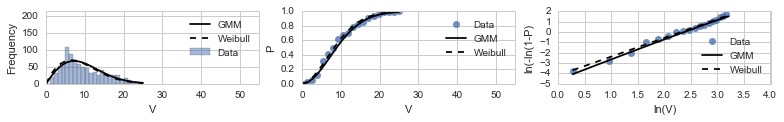

data size: 884 weight 0.0206267354225
GMM Weibull
R square 0.78984670239 0.801223702817
max diff: 0.095620579457 0.0487682597153 speed value: 9.21052631579 y gmm 0.520895257647
 
25.0 (15.0 - 35.0) degree


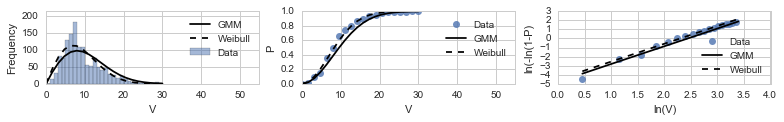

data size: 1348 weight 0.0314534381781
GMM Weibull
R square 0.768766150935 0.838828510597
max diff: 0.163012248974 0.0630804019579 speed value: 9.47368421053 y gmm 0.493515940937
 
45.0 (35.0 - 55.0) degree


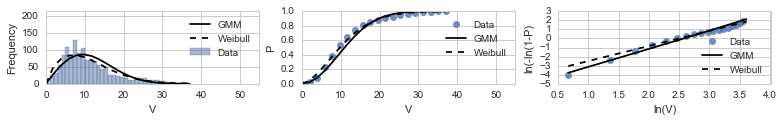

data size: 1339 weight 0.0312434374781
GMM Weibull
R square 0.823755343895 0.866141823412
max diff: 0.112628486216 0.0547874291964 speed value: 9.73684210526 y gmm 0.422098922297
 
65.0 (55.0 - 75.0) degree


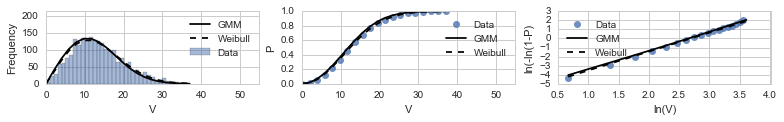

data size: 2182 weight 0.050913503045
GMM Weibull
R square 0.950258512908 0.967452569436
max diff: 0.0330236541345 0.0178655261869 speed value: 9.73684210526 y gmm 0.364829336994
 
85.0 (75.0 - 95.0) degree


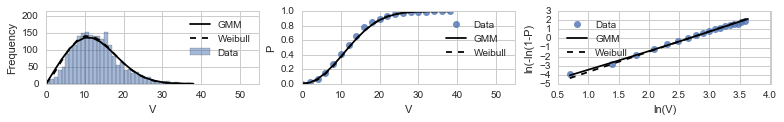

data size: 2186 weight 0.0510068366895
GMM Weibull
R square 0.943537706827 0.958319254689
max diff: 0.0609855420006 0.0572856377516 speed value: 16.0 y gmm 0.726297166142
 
105.0 (95.0 - 115.0) degree


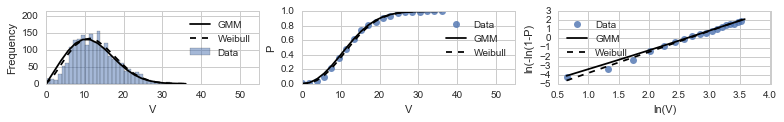

data size: 1994 weight 0.0465268217561
GMM Weibull
R square 0.917645221665 0.947290078778
max diff: 0.0516563089135 0.0437704284322 speed value: 5.68421052632 y gmm 0.143933139405
 
125.0 (115.0 - 135.0) degree


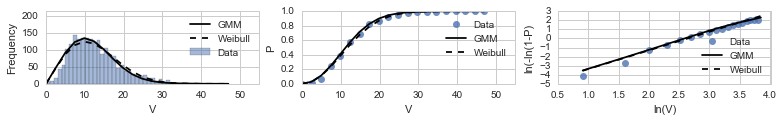

data size: 2009 weight 0.0468768229227
GMM Weibull
R square 0.957395550578 0.950686005529
max diff: 0.0507069401104 0.0466506873463 speed value: 4.94736842105 y gmm 0.115415750464
 
145.0 (135.0 - 155.0) degree


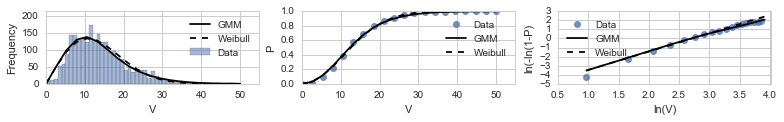

data size: 2354 weight 0.0549268497562
GMM Weibull
R square 0.942459223705 0.939984233619
max diff: 0.0291871735869 0.0460941822873 speed value: 13.1578947368 y gmm 0.548128034569
 
165.0 (155.0 - 175.0) degree


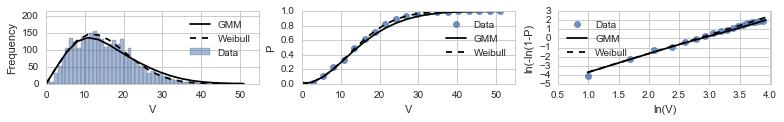

data size: 2786 weight 0.0650068833563
GMM Weibull
R square 0.949716436591 0.96417394976
max diff: 0.0614466456029 0.0297133573689 speed value: 24.1578947368 y gmm 0.83553827902
 
185.0 (175.0 - 195.0) degree


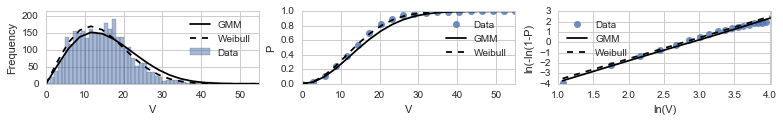

data size: 3167 weight 0.0738969129897
GMM Weibull
R square 0.940441489796 0.954151625152
max diff: 0.0953507590936 0.0235895413196 speed value: 20.2631578947 y gmm 0.725931211225
 
205.0 (195.0 - 215.0) degree


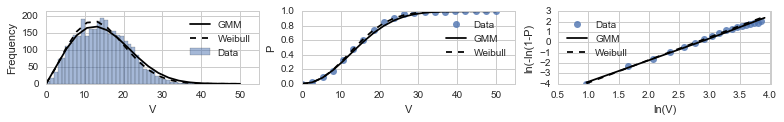

data size: 3267 weight 0.0762302541008
GMM Weibull
R square 0.972176447995 0.968611119705
max diff: 0.0549357664917 0.0200739072865 speed value: 21.0526315789 y gmm 0.798446541436
 
225.0 (215.0 - 235.0) degree


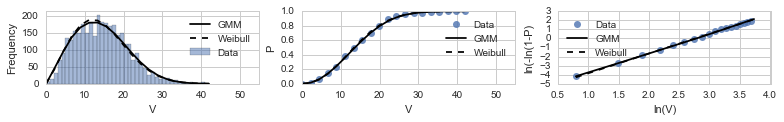

data size: 3333 weight 0.0777702592342
GMM Weibull
R square 0.963895313073 0.956538021462
max diff: 0.03029076556 0.0236119186118 speed value: 11.0526315789 y gmm 0.359148178334
 
245.0 (235.0 - 255.0) degree


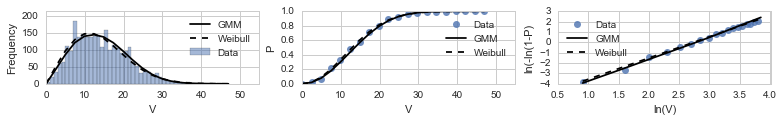

data size: 2665 weight 0.0621835406118
GMM Weibull
R square 0.938487532255 0.936242072665
max diff: 0.0474060419671 0.0246178973287 speed value: 12.3684210526 y gmm 0.434770318258
 
265.0 (255.0 - 275.0) degree


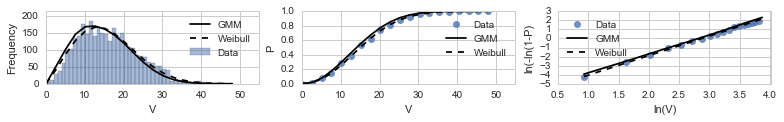

data size: 3307 weight 0.0771635905453
GMM Weibull
R square 0.938411516241 0.96352266363
max diff: 0.0549520869341 0.0314309408792 speed value: 17.6842105263 y gmm 0.673639719229
 
285.0 (275.0 - 295.0) degree


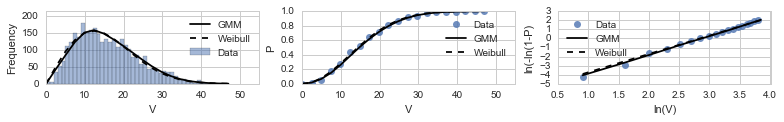

data size: 3132 weight 0.0730802436008
GMM Weibull
R square 0.961420421532 0.95800520185
max diff: 0.0495393035196 0.032027556586 speed value: 12.3684210526 y gmm 0.383730172853
 
305.0 (295.0 - 315.0) degree


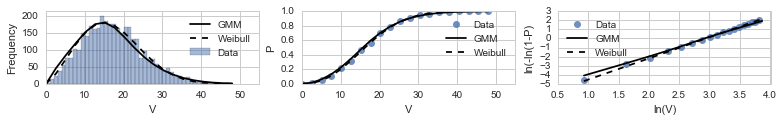

data size: 3596 weight 0.0839069463565
GMM Weibull
R square 0.946930701299 0.973332528303
max diff: 0.0366179225967 0.0177285983836 speed value: 12.6315789474 y gmm 0.347240836946
 
325.0 (315.0 - 335.0) degree


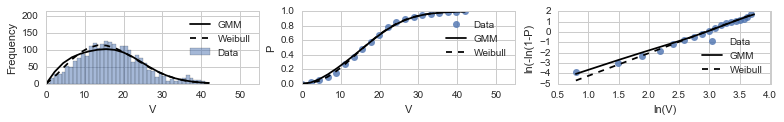

data size: 2358 weight 0.0550201834006
GMM Weibull
R square 0.889261033117 0.931728079566
max diff: 0.0558852912735 0.0244809735242 speed value: 8.84210526316 y gmm 0.208981135209
 
345.0 (335.0 - 355.0) degree


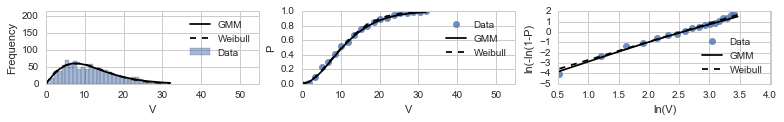

data size: 950 weight 0.0221667405558
GMM Weibull
R square 0.926614496349 0.912379134005
max diff: 0.0594462853979 0.047931620935 speed value: 5.05263157895 y gmm 0.171080030392
 


In [57]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

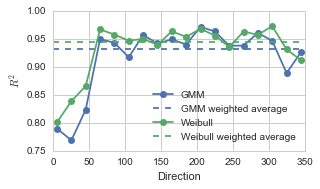

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")

(0.0, 0.20000000000000001)

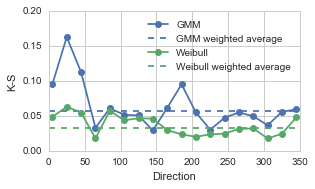

In [59]:
plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)

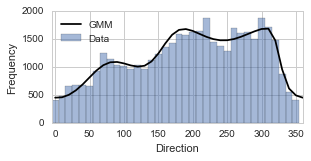

In [60]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [61]:
FRACTION = 1

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

25.0 (15.0 - 35.0) Degree Speed Distribution
0.233172745717 9.0 0.459705592562


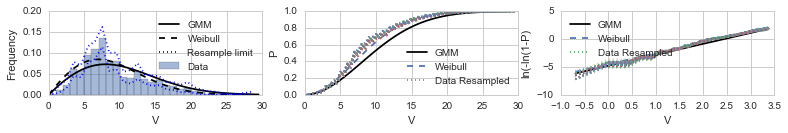

In [63]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
#     sub_df_resampled['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data Resampled', normed=True)  
    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()]

### 5.3.2 Time Variability

In [64]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXmYFNW997+19jYrsu+LAuKCooYokmCEXMQl9wa4gor6
4E2iJuaqia/RxKDJRTRqNDdxojFGRb2OGtGocQsCLkiURVAwoIKy6iDLLL3W+v5Rc2qqa6q7q7ur
erqnz+d5fGR6OX26q+p867ceRtd1HRQKhUKhULLC9vQEKBQKhUKpBKhgUigUCoXiAiqYFAqFQqG4
gAomhUKhUCguoIJJoVAoFIoLqGBSKBQKheICKpgUCoVCobiACiaFQqFQKC6ggkmhUCgUiguoYFIo
FAqF4gIqmBQKhUKhuIAKJoVCoVAoLqCCSaFQKBSKC6hgUigUCoXiAiqYFAqFQqG4gAomhUKhUErG
7t278eMf/xjz5s3DJZdcgssvvxyffvopfv/732PChAn46quvzNceOnQIxx57LJ577jns3bsX48eP
xwMPPJA23uWXX46LL764JHOngkmhUCiUkpBMJnHllVfiv/7rv9Dc3IxHHnkEP/zhD/GrX/0KDMNg
1KhRePnll83X//3vf8fgwYPNv4cPH47XXnvN/Lu1tRW7du0q2fz5kn0ShUKhUMqG6667Dk8//bSn
Y86dOxd33HFHxudXrFiBr3/96zj++OPNx4477jgsXboUf/jDH3DWWWfh5ZdfNi3GVatW4YwzzjBf
29jYiMbGRuzYsQOjR4/Gyy+/jLPOOgtr16719HtkglqYFAqFQikJe/bswYgRI8y/r7zySixYsAAz
Z85ES0sL+vbti3A4jD179mDXrl0YNGgQAoFA2hhnn302/v73vwMAXn/9dUyfPr1k86cWJoVCoVQh
d9xxR1Zr0A8GDRqEzZs3m383NTUBAM4//3woigKGYUxBlGUZ5557Lt5++23z9QzDYPr06bjgggvw
3e9+F/369esmqH5CLUwKhUKhlIQzzzwTa9aswQcffGA+tnPnTnz55ZdgGAYA8O1vfxuvv/46NmzY
gMmTJ3cbIxQKYdSoUbjjjjtw7rnnAgB0XS/J/KmFSaFQKJSSEA6Hcd999+HOO+/EV199BUVRwPM8
brzxRnzyyScAgJqaGgwcODDNdWvn3HPPxaJFi3D33Xfjs88+M8XWbxi9VNJMoVAoFEoFQ12yFAqF
QqG4gAomhUKhUCguoIJJqVp0XYeiKCVLGKBQKJUNTfqhVB26rkNVVciyjFQqBY7jwLIsNE2DrusI
BoMQBKFkiQQUCqUyoIJJqRp0XUcikUA0GkUwGIQoimBZw8miaRoSiQRUVYWu60gmk2AYBizLmv9x
HAeO46iQUihVChVMSq+HWJSKokBRFPPfkiRBURTTwrS6ZokoappmWp7kcSKk5P88z5t/UyiU3guN
YVJ6LSRGmUqlzC4imqYBAFKpFGRZNl8jSZL5XDweRzweRzKZNEXVKqZWAU6lUojFYujo6EA0GkU8
HkcikYAkSaa1SqFQDC699FJ8+OGHAABZlnHyySfjL3/5i/n8ggULsHXr1m7ve+utt/D0009j7969
OP/8811/3umnn26O+9lnnxU5e2phUnohVkEDDKtQURQkEgnIsgwAYFkW4XDYFElN00zRJMJKnrNC
rFHrf8SyJJ8LwBRj++uIW5e4gimUamLKlClYv349jjvuOKxbtw5Tp07FG2+8gYULF0KSJHzxxRcY
P358t/dNnToVALB3794e9eTQq5bSa3CyKFVVRUdHB9rb2yHLMjiOAwAEAgEIgmCKGXGrAkbrrUgk
gnA4bL6OxC6tyUKJRAKxWAyxWAyJRMK0WoloWuOjiqJAlmUzhtrR0WG+L5lM0mxdSo8wcqTzf169
3s5pp52GdevWAQDefPNNzJ071/TOvP/++zjllFOwdu1aXHDBBViwYAF+/vOfQ1EUPPvss7jrrrsA
AAcPHsSVV16J888/H3/84x8BADfccIPZc/att97CDTfc4H5SeUAtTErFQyw74gJ1sih5nkcoFIKu
64hGoznHtMYq7Z9FrE/rf+Tz7WPYLVIyLoA0K1aSpLT3kM+miUaU3sSECROwY8cOAMDatWtx7bXX
4tRTT8U777yDbdu24fTTT8cvfvELPPHEE+jTpw9+97vf4dlnnwXP8+Y1kEgkcMcddyAUCuHCCy9M
2/7Lb6hgUioWJ6FUVdVRKMkFRx4vFKtb1T4XIpxWISVuYSt2l65dSInw2hONyHOCICAQCNBEI0rR
fP65v6+3wzAMxo8fjzfffBP9+vWDIAiYOnUqVq1ahW3btuHCCy/ETTfdhKuvvhq6rkOSJJx22mkY
Pny4Oca4ceMQiUQAGHtpfm6blJ+eGiqYlIqjEKF0GsNLnIRU1/WMFmkh8VFFUZBMJiGKImRZTrNC
rRm7VoGlUMqNU089Fffffz/OOeccAMBJJ52Ee++9FyzLorGxEYMGDUJTUxNqamqwYsUKRCIR7Nu3
z3z/9u3bkUgkIAgCPvjgA5x//vlYs2YNvvrqKwDARx995NvcqWBSKgYvhDIbVnHygmxuXfJd3Lh1
iXha30/+JkJqnbf1PQzDgOd56tallA1TpkzBL3/5S3MvTkEQUF9fj6OPPhoMw+DGG2/E97//fWia
htraWtx+++1pgtnQ0IBrrrkGhw4dwqxZszBmzBjMnTsXN954I1544QWMdAiqenXu091KKGWPmxgl
x3EIh8M5hVJRFLS3tyMYDCIcDpuxQ6Cr1CQUCnVzuZaCTNao0yWaKz5qH5e8hzZioFAKh1qYlLKF
JOhIkmSKmN2i5DgOoVCoV7SyyxUflWXZzP61WpZWcsVHaSMGCqVwqGBSyg6rRSlJEiRJgiiKZkMA
oHihrCTHChFSIpKCIEAQhLzio8SizFU/qus6UqmU+R67RUqFlFLNUMGklA1OrlcibKQUpDdZlMWQ
b3zUSUjtLtpMQmrtWGSPj3IcV1C8mEKpRKhgUnocJ6EkzdDtnXmKFcrevrD3ZP0oeZ2u6+B5HqIo
9vrfm1JdUMGk9BjZhNK6EOu6jnA4DFEUPf1s6/hOz/UmSlE/SsYhKf9kNxhrfJQmGlEqGSqYlJLj
RiiJ65W0oSvFAluNi7gX9aPW+KZ9xxd7fNT6Hqf+utV4DCiVAxVMSsnIRyiJ69XuLiwWuiDnxov4
qCzL0DQtr0b1VlcwbVRPKUeoYFJ8pxChdBqD0rO4iY+S/UYB5BUftTaqzxQfpY0YKD0NFUyKb3gh
lH4tilSAvcNqDRKvgCiKEATB0/gobVRP6WmoYFI8x61QBoNBmknZi/E6Pmp36wKZG9XTRgwUP6CC
SfEM0mgA6Fq4NE1DMplMK4YPhUJ5C6WX/V0pPUeu+KiTRVpo/Sj5t/Xcs1ukVEgp+UAFk1I0ZIGK
x+OIxWJmvaQXQumnS5a0m7NaJOQ5SmmxCinPdy1LXtaPWtsJkg5SxMtBGzFQ3EAFk1IwTq5XwFiM
4vE4gMKF0umzvERVVbS2tqY9RuZH+rVma2hOccbqGvUCv+pHredTrkQjGh+lEKhgUvImU4wymUwC
MATHK6H0coHSdR2JRML8N8MwZmKKddG0Wy+54miU0uNFfBToKmlxOq60UT3FDhVMimuyCSVxvQLG
/nY1NTWei10x700mk0gmk+Y4LMuivr4eiqKYjxE3HVkE7RaMFasFYo2F0YWz58gnPpqp9KWY+Cht
VN/7oYJJyUmmpujxeDxtwRBFEclksmxcV2RBSyQS5rxDoRASiYSjuJG/OY6DIAhp42SLo5F+t4Cz
+48W3vcsTvFRsvdpIBAAAE/io7RRfe+HCiYlI26FkrheVVU13bJeUcjiQoQymUyalmEwGEQwGATL
sqZbloyfy3r

### 5.3.3 Adjacent Sector Variability

In [65]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

for curves in curve_collection:
    if curves['angle'] in angle_group:
        angle, data_size, x = curves['angle'], curves['data_size'], curves['x']
        y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
        y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']
        
        linestyle = '-' if angle == max_diff_angle else ':'
        alpha = 0.7 if angle == max_diff_angle else 0.3
        
        ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
        ax3.plot(x, y_weibull*data_size, linestyle, label=angle)
        
        start_angle, end_angle = angle-incre/2, angle+incre/2
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        
        x_3d = angle*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
        ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')
        
        count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
        ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)
        
        if legend_3d == False:
            ax1.legend()
            legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print max_diff_angle
print 'GMM, Weibull, Histogram'
align_figures()

25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXe8FOW9/z/Ttp/CoUivUoWIUkRRbJirGK+/eEMU1Gii
UWxJJDeJndzEGHPxRpOIiTcaE4gNr8EKUVEJqKDYEFFRmggI0s7ZvlN/f+x55szOmd2d3Zntz/v1
4qXnnJ15puw8n/nWh9E0TQOFQqFQKJScsJU+AAqFQqFQagEqmBQKhUKh2IAKJoVCoVAoNqCCSaFQ
KBSKDahgUigUCoViAyqYFAqFQqHYgAomhUKhUCg2oIJJoVAoFIoNqGBSKBQKhWIDKpgUCoVCodiA
CiaFQqFQKDaggkmhUCgUig2oYFIoFAqFYgMqmBQKhUKh2IAKJoVCoVAoNqCCSaFQKJSy8cUXX+AH
P/gBLrjgAlxyySWYN28etmzZgj/84Q8YN24c9u/fr3/20KFDGD9+PJ566ins3r0bY8aMwZ///OeM
/c2bNw/f+c53ynLsVDApFAqFUhaSySSuvvpqXH755Xjsscfwt7/9Dddccw1+8YtfgGEYDBs2DCtW
rNA///zzz6N///76z4MHD8aLL76o/9ze3o6dO3eW7fj5so1EoVAolKrhJz/5CZ544glX9zl79mws
XLgw699feeUVTJs2DV/72tf0302YMAGLFy/Gvffei7POOgsrVqzQLcZVq1bh1FNP1T/bo0cP9OjR
A9u2bcPw4cOxYsUKnHXWWVi/fr2r55ENamFSKBQKpSzs2rULQ4YM0X+++uqrcfHFF+PMM8/Evn37
0KtXLwQCAezatQs7d+5Ev3794PV6M/Zx9tln4/nnnwcAvPzyy5g5c2bZjp9amBQKhdKALFy4MKc1
WAr69euHDz/8UP/5vvvuAwCcf/75kGUZDMPogihJEs455xy89tpr+ucZhsHMmTMxd+5cnHfeeejd
u3c3QS0l1MKkUCgUSlk4/fTTsXbtWnzwwQf67z7//HPs3bsXDMMAAL7+9a/j5Zdfxrvvvovjjjuu
2z78fj+GDRuGhQsX4pxzzgEAaJpWluOnFiaFQqFQykIgEMCf/vQn3HXXXdi/fz9kWQbP87jpppvw
2WefAQBCoRD69u2b4bo1c84552DBggW4++67sX37dl1sSw2jlUuaKRQKhUKpYahLlkKhUCgUG1DB
pFAoFArFBlQwKQ2LpmmQZblsCQMUCqW2oUk/lIZD0zQoigJJkpBKpcBxHFiWhaqq0DQNPp8PgiCU
LZGAQqHUBlQwKQ2DpmlIJBKIRqPw+XzweDxg2bSTRVVVJBIJKIoCTdOQTCbBMAxYltX/cRwHjuOo
kFIoDQoVTErdQyxKWZYhy7L+/6IoQpZl3cI0umaJKKqqqlue5PdESMl/eZ7Xf6ZQKPULjWFS6hYS
o0ylUnoXEVVVAQCpVAqSJOmfEUVR/1s8Hkc8HkcymdRF1SimRgFOpVKIxWKIRCKIRqOIx+NIJBIQ
RVG3VikUSppLL70UGzduBABIkoTJkyfjL3/5i/73iy++GJ988km37dasWYMnnngCu3fvxvnnn297
vBNPPFHf7/bt2x0ePbUwKXWIUdCAtFUoyzISiQQkSQIAsCyLQCCgi6SqqrpoEmElfzNCrFHjP2JZ
knEB6GJs/hxx6xJXMIXSSEyfPh3vvPMOJkyYgLfffhsnnXQS/vWvf+F73/seRFHEl19+iTFjxnTb
7qSTTgIA7N69u6KeHPrUUuoGK4tSURREIhGEw2FIkgSO4wAAXq8XgiDoYkbcqkC69VYwGEQgENA/
R2KXxmShRCKBWCyGWCyGRCKhW61ENI3xUVmWIUkSOjo6sG/fPrS3t+vbJZNJmq1LqQhDh1r/c+vz
Zk444QS8/fbbAIDVq1dj9uzZunfmvffew5QpU7B+/XrMnTsXF198MW6++WbIsoxly5bhf/7nfwAA
Bw8exNVXX43zzz8ff/zjHwEAN954o95zds2aNbjxxhvtH1QBUAuTUvMQy464QK0sSp7n4ff7oWka
otFo3n0aY5XmsYj1afxHxjfvw2yRGkXRaMWKopixDRmbJhpR6olx48Zh27ZtAID169dj/vz5OP74
4/HGG29g8+bNOPHEE3HLLbfg0UcfRVtbG373u99h2bJl4HlefwYSiQQWLlwIv9+PCy+8MGP5r1JD
BZNSs1gJpaIolkJJHjjy+2IxulXNx0KE0yikxC1sRhTFDDElAg1AF16aaEQpNTt2lPbzZhiGwZgx
Y7B69Wr07t0bgiDgpJNOwqpVq7B582ZceOGFuPXWW/GjH/0ImqZBFEWccMIJGDx4sL6P0aNHIxgM
AkivpbnDdFCl9NRQwaTUHMS9ScTCjlCacfuhshJSTdO6WaREQK0sUrvxUXPZi9EiJedLhZRSrRx/
/PG4//778Y1vfAMAMGnSJCxatAgsy6JHjx7o168f7rvvPoRCIbzyyisIBoPYs2ePvv3WrVuRSCQg
CAI++OADnH/++Vi7di32798PAPjoo49KduxUMCk1AxGNaDSKRCKBpqYmMAxTkFDmwihObmDl1iVx
TrKGnx23rllEyT9yrESEjcctSRJ4nofX6wXP89StS6kapk+fjttuu01fi1MQBLS0tGDs2LFgGAY3
3XQTrrjiCqiqiqamJvzmN7/JEMzW1lZcf/31OHToEGbNmoURI0Zg9uzZuOmmm/Dss89iqEVQ1a3v
Pl2thFL1mF2vyWQSiUQCHMfpAsNxHAKBQF6hlGUZ4XAYPp8PgUBAjx0CXWLm9/u7uVzdgozh8/nA
85nvq9nio1aPqFV8lAi0qqqIx+PgeR4+ny/DtUsbMVAoxUMtTErVki1GmUqlAKTdmhzHwe/310Ur
Ozfio0Y3Lvmc0UVLGzFQKMVDBZNSdWQTStJIgODz+eD3+4ua2CvlWCnmWO3GR821o8TSBKBblHbi
o+SFxOwCJttTIaU0KlQwKVWDlVCSHq9EKDmOA8/zetP0Rp28c5W9kJcL8ncrMSX7sIqNmoXU2LHI
uA2QFlVSz0qh1DtUMCkVx65QEtcrsYCKod4F1iiiHMfB5/MBcF4/auXWJQ0czE0gaHyUUq9QwaRU
jEKF0lhG4sbYZF9m92w95sG5FR/N1oQB6B4fNW5DGzFQ6gEqmJSyQ7rtqKoKr9drWyit9uMmjTiJ
FxofteqvS3rw2omPErL1123Ee0CpHahgUsqG0aKMxWJgGAaCIBQslE4mVToh5ydXfJTcQ2KFkt+Z
OyjZjY8CXY3qja5g2qieUo1QwaSUHCvXK5loOzo6ANgTSkplMQspwzAQRRFer7dbclGh8VFjo3pz
f12yHxIrpY0YKJWCCialZOSKURKcCKUTl2w9xikrRSnio+ZGDMaVZmijekqloIJJcR07yTyE5ubm
olvYUaobN+KjRncsSSgy3n/aqJ5STqhgUlwjm1Amk8mMYni/349EItFt8itmvEKhk2ZlyRcftbJI
CaIoQhTFguKj5kYMZouUCimlEKhgUhxTiFB6PB4wDINkMmlpUZTzmM243Xy93nHzOhmF1Nhjl/QO
Jm0QARRdP2rVqJ42YqAUAhVMStEUI5QE4yRGXbK1TSnvBxE0RVHg8Xh00XQrPgogI0kpkUjoTetp
IwaKGSqYlILRNA2xWAyiKMLn84HjONtC6fZxUBoTt+KjRovUaHUCtFE9pTtUMCm2MVqUqVQKoijC
4/EUJZSVqqWkE1v9Ukx81EpIiZVKG9VTzFDBpOTFyvVKiEQiAIq3KJ0m/hQLtU5rB6f3Kld81Fw3
SixKq0YM+eKjuRrVk+2LWdicUj1QwaRkJVvDgXg8nlELFwgEChZKN/vBOsGql2w5oIJdOG4Ljdmt
K8syksmk3hz

# 6. Result Variability & Cross-Validation

In [66]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.596  -4.744   -7.039  11.843  10.030  -0.383
2  0.350  -0.322    6.164   7.532   7.918   0.137
3  0.054   8.203  -10.779   7.882   4.443  -0.693

GMM Plot Result
0.595766144409 [[-4.74352888 -7.03944659]] [  8.41459141  13.04051263] -123.221200235
0.350412886803 [[-0.32198746  6.16357878]] [ 7.14189587  8.27153491] 145.022043497
0.053820968788 [[  8.20268939 -10.77891275]] [ 2.95355     8.55230188] -114.430900943


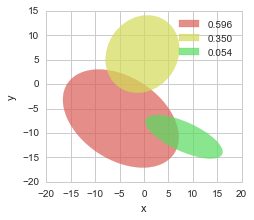

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.007      0.022  1.902171e-09      0.032       0.136

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.008      0.019  1.754715e-09      0.030       0.130

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.568  -4.634   -7.706  12.058  10.005  -0.396
2  0.370  -0.576    5.933   7.673   8.049   0.127
3  0.062   7.589  -10.293   8.457   4.876  -0.739

GMM Plot Result
0.567887344414 [[-4.63406453 -7.70561326]] [  8.36139101  13.25083865] -122.305010679
0.370024402286 [[-0.57583605  5.93314646]] [ 7.30899007  8.38127229] 145.299815503
0.0620882532996 [[  7.58882863 -10.29282687]] [ 2.98773381  9.2937228 ] -115.96860756


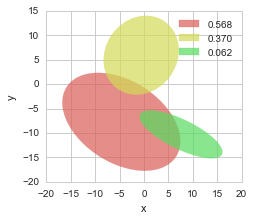

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.008      0.019  1.915693e-09      0.031       0.136

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.008      0.019  1.779208e-09      0.030       0.131

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.486  -1.323    4.093   8.043   8.590   0.152
2  0.390  -7.497   -8.638  11.196  10.591  -0.525
3  0.124   8.782  -11.050   7.352   5.368  -0.456

GMM Plot Result
0.486368266315 [[-1.32256375  4.09255426]] [ 7.60304798  8.98181298] 146.735768892
0.38995970512 [[-7.49655591 -8.63770242]] [  7.49703013  13.46532573] -131.97284
0.123672028565 [[  8.78156993 -11.0499236 ]] [ 4.41271499  7.96198502] -117.473650012


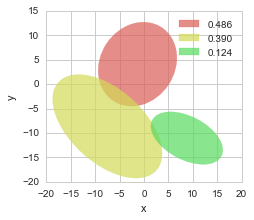

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.005      0.020  1.856092e-09      0.030       0.134

R_square       K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.004716      0.019  1.764512e-09      0.030       0.131

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.460  -0.898    4.683   7.875   8.229   0.116
2  0.372  -8.934   -8.235  10.647  10.528  -0.507
3  0.168   7.060  -10.568   8.509   6.034  -0.540

GMM Plot Result
0.459980651603 [[-0.89784223  4.68329636]] [ 7.53886729  8.53846322] 145.383378348
0.372283780189 [[-8.93371397 -8.23515854]] [  7.43296879  12.99817648] -134.368835853
0.167735568208 [[  7.05956155 -10.56845256]] [ 4.62032798  9.35217855] -118.506336156


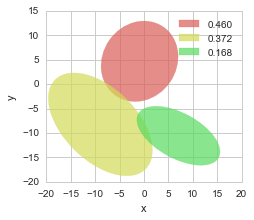

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.006      0.023  1.902165e-09      0.031       0.136

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.006      0.022  1.817064e-09      0.030       0.133

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.474  -1.170    4.262   7.869   8.516   0.148
2  0.377  -8.485   -8.124  10.396  10.611  -0.500
3  0.150   8.696  -11.451   7.282   5.941  -0.420

GMM Plot Result
0.473613056691 [[-1.17049656  4.26220828]] [ 7.48246022  8.85713156] 149.0903078
0.376606028958 [[-8.484714  -8.1235108]] [  7.4234106   12.86710943] -136.173151423
0.149780914351 [[  8.69593283 -11.4505106 ]] [ 4.89220396  8.02361586] -121.99857596


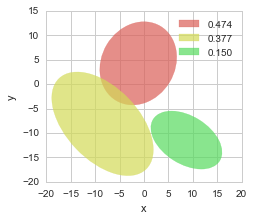

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.006      0.019  1.824011e-09      0.031       0.133

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.006      0.019  1.828500e-09      0.030       0.133

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.402  -0.113   5.592   7.658   7.827   0.022
2  0.400  -8.798  -8.018  10.339  10.576  -0.515
3  0.198   5.341  -9.474   9.771   6.850  -0.666

GMM Plot Result
0.401809947103 [[-0.11337736  5.59172688]] [ 7.62119917  7.86259116] 157.159097182
0.399819673082 [[-8.79759615 -8.01769939]] [  7.28057359  12.87451993] -136.259450241
0.198370379815 [[ 5.3411246  -9.47418526]] [  4.51877013  11.04402325] -120.718193416


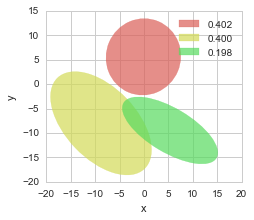

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.008      0.031  2.019389e-09      0.032       0.140

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.006      0.028  1.888088e-09      0.031       0.135

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.534  -1.825    3.343   8.270   9.012   0.182
2  0.340  -7.524   -9.455  11.511  10.940  -0.587
3  0.126   8.893  -10.991   7.491   5.378  -0.466

GMM Plot Result
0.534445606791 [[-1.82547487  3.34317446]] [ 7.73277968  9.47668355] 147.637065701
0.339578112557 [[-7.52433394 -9.45540044]] [  7.20497476  14.15224848] -132.519901162
0.125976280652 [[  8.8932302  -10.99058802]] [ 4.39923824  8.10404771] -117.029303443


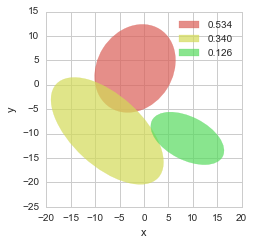

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.007      0.018  1.782360e-09      0.030       0.132

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.007      0.018  1.821593e-09      0.030       0.133

weight  mean_x   mean_y   sig_x  sig_y    corr
1  0.671  -5.585   -5.026  10.196  9.921  -0.245
2  0.249   1.176    7.385   6.511  7.595   0.015
3  0.080  10.901  -12.801   6.316  5.485  -0.439

GMM Plot Result
0.671031874659 [[-5.58544755 -5.02615401]] [  8.73134711  11.23136566] -131.822515401
0.249256625181 [[ 1.17560982  7.38522269]] [ 6.5079645  7.5970376] 177.186064582
0.0797115001592 [[ 10.90109164 -12.80125806]] [ 4.36127532  7.13838495] -126.057225042


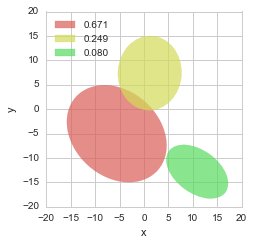

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.013      0.041  2.005008e-09      0.032       0.139

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.015      0.036  1.845153e-09      0.030       0.134

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.596  -4.482  -7.436  12.050  10.031  -0.398
2  0.352  -0.386   6.015   7.509   7.810   0.080
3  0.052   6.723  -9.711   8.565   4.486  -0.753

GMM Plot Result
0.59630783164 [[-4.48247457 -7.43581733]] [  8.36116903  13.26361294] -122.561789024
0.351980376663 [[-0.38594914  6.01504585]] [ 7.31050644  7.99573243] 148.052082907
0.0517117916973 [[ 6.72274996 -9.71120083]] [ 2.72349625  9.2765744 ] -113.698511665


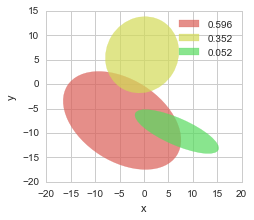

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.005      0.026  1.758543e-09      0.030       0.131

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.006      0.022  1.770064e-09      0.030       0.131

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.537  -1.705    3.401   8.317   8.988   0.167
2  0.335  -7.661   -9.297  11.211  10.612  -0.563
3  0.128   9.017  -11.381   7.267   5.514  -0.482

GMM Plot Result
0.537353305297 [[-1.70459835  3.40084706]] [ 7.82345898  9.42140732] 147.460718781
0.334891892733 [[-7.66067734 -9.29724798]] [  7.20260121  13.65398981] -132.21083706
0.12775480197 [[  9.01705175 -11.38148948]] [ 4.39046067  7.99594994] -119.945363961


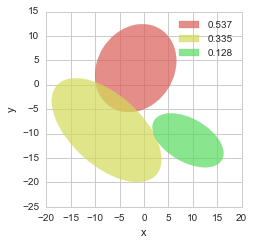

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.005      0.019  1.878409e-09      0.030       0.135

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.986  0.007      0.019  1.798305e-09      0.030       0.132

In [67]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, fit_method=FIT_METHOD, 
                     config=config, number_of_gaussian=NUMBER_OF_GAUSSIAN, )
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print ' '

## 6.2 Cross-validation, to select the number of Gaussian

In [68]:
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, fit_method = FIT_METHOD, 
                         config=config, number_of_gaussian=number_of_gaussian)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32142.75 10714.25
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.074895  0.019350  7.848711e-09    0.063573     0.276090  0.937172
1    0.074058  0.018941  8.008248e-09    0.063390     0.278348  0.935996
2    0.074607  0.019315  8.455908e-09    0.064295     0.286567  0.932826
3    0.074013  0.018852  7.871783e-09    0.063037     0.276027  0.936633

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.078495  0.017880  8.968990e-09    0.064620     0.294069  0.928746
1    0.084728  0.032982  9.250601e-09    0.067405     0.300373  0.926171
2    0.078168  0.021739  7.357727e-09    0.063712     0.266358  0.940329
3    0.079306  0.016457  8.858087e-09    0.065198     0.293736  0.930686

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.035258  0.014194  3.040878e-09    0.038672     0.171583  0.975566
1    0.032125  0.011772  2.556782e-09    0.035157     0.157399  0.979814
2    0.027915  0.009913  2.333470e-09    0.034599     0.150560  0.981226
3    0.030953  0.011487  2.592785e-09    0.036639     0.158516  0.979216

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.038808  0.013671  3.393109e-09    0.042404     0.181719  0.973334
1    0.030686  0.016826  3.279119e-09    0.041816     0.178420  0.972869
2    0.037781  0.021152  3.728545e-09    0.042083     0.189527  0.970835
3    0.041178  0.013260  2.873031e-09    0.035524     0.166968  0.977265

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017315  0.005977  1.651191e-09    0.029464     0.126546  0.986768
1    0.022150  0.006641  1.802484e-09    0.030266     0.132248  0.985403
2    0.017064  0.005735  1.719921e-09    0.028939     0.129137  0.986271
3    0.023232  0.006800  1.813939e-09    0.029471     0.132508  0.985671

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.032505  0.011417  2.932348e-09    0.034241     0.168495  0.976811
1    0.029355  0.011500  2.361723e-09    0.033391     0.151107  0.981854
2    0.021119  0.011943  2.375154e-09    0.035724     0.151701  0.980944
3    0.022023  0.012879  2.300173e-09    0.036073     0.149664  0.980963

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.015581  0.007705  1.069470e-09    0.023233     0.101711  0.991504
1    0.016275  0.007028  1.027168e-09    0.022675     0.099802  0.991768
2    0.014095  0.005187  8.972300e-10    0.021321     0.093306  0.992778
3    0.014244  0.005720  9.675358e-10    0.021943     0.096895  0.992272

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.025192  0.012908  1.359999e-09    0.025720     0.115199  0.988934
1    0.014850  0.010031  1.284801e-09    0.025663     0.111557  0.989807
2    0.023256  0.008837  1.856244e-09    0.030158     0.133959  0.985479
3    0.021626  0.007336  1.734068e-09    0.029663     0.129466  0.986130

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.013839  0.004781  7.735658e-10    0.020100     0.086570  0.993807
1    0.009296  0.007059  7.730282e-10    0.019652     0.086581  0.993771
2    0.017192  0.004295  6.875046e-10    0.018454     0.081629  0.994495
3    0.011740  0.004589  6.862044e-10    0.018435     0.081584  0.994561

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.022026  0.011772  1.186200e-09    0.023124     0.107336  0.990562
1    0.014979  0.009369  1.342237e-09    0.025978     0.114018  0.989535
2    0.020240  0.014614  1.501699e-09    0.027917     0.120698  0.988066
3    0.014965  0.008523  1.413344e-09    0.026539     0.116955  0.988406

  
Number of gaussian 6
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.010748  0.006631  5.842530e-10    0.017089     0.075259  0.995351
1    0.011796  0.004590  6.199853e-10    0.017751     0.077508  0.995017
2    0.009813  0.004691  5.640069e-10    0.016518     0.073921  0.995481
3    0.013701  0.008193  5.987015e-10    0.017388     0.076225  0.995218

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.014630  0.012606  1.154717e-09    0.023730     0.105802  0.990643
1    0.016117  0.010774  1.220759e-09    0.023704     0.108863  0.990405
2    0.014133  0.011424  1.292542e-09    0.025345     0.112041  0.989752
3    0.018851  0.011469  1.547798e-09    0.027205     0.122296  0.987629

In [69]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.074393  0.019114  8.046162e-09    0.063574     0.279258  0.935656
2    0.031562  0.011842  2.630979e-09    0.036267     0.159515  0.978955
3    0.019940  0.006288  1.746884e-09    0.029535     0.130110  0.986028
4    0.015049  0.006410  9.903509e-10    0.022293     0.097929  0.992081
5    0.013017  0.005181  7.300757e-10    0.019160     0.084091  0.994159
6    0.011515  0.006026  5.917367e-10    0.017187     0.075728  0.995267

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.080174  0.022264  8.608851e-09    0.065234     0.288634  0.931483
2    0.037113  0.016227  3.318451e-09    0.040457     0.179159  0.973576
3    0.026250  0.011935  2.492350e-09    0.034857     0.155242  0.980143
4    0.021231  0.009778  1.558778e-09    0.027801     0.122545  0.987587
5    0.018053  0.011070  1.360870e-09    0.025890     0.114752  0.989142
6    0.015933  0.011568  1.303954e-09    0.024996     0.112250  0.989607

R_square


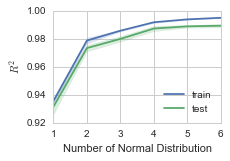

K_S


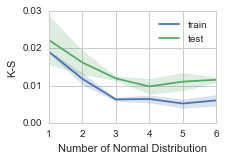

Chi_square


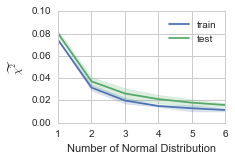

In [70]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

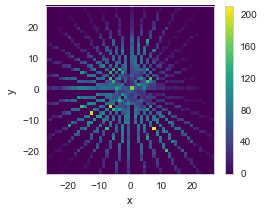

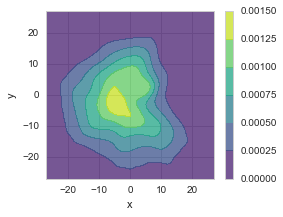

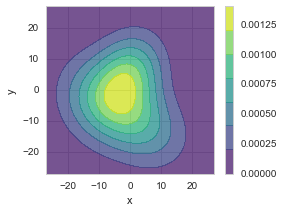

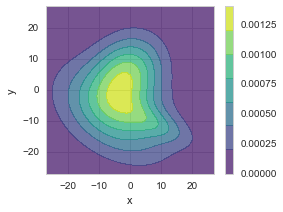

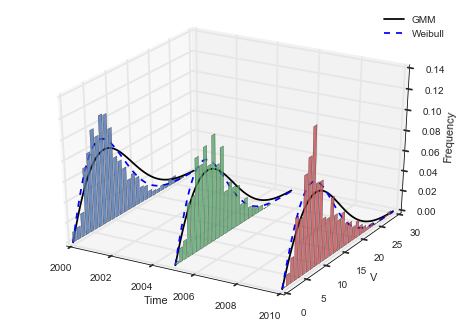

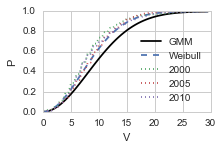

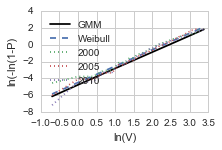

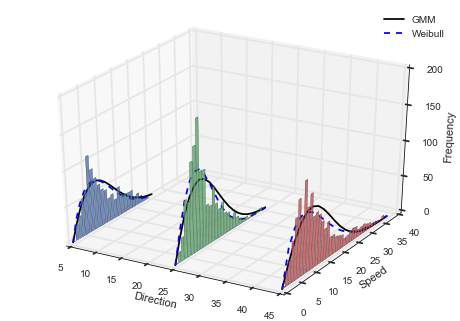

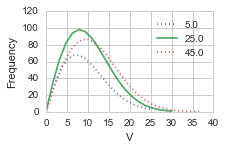

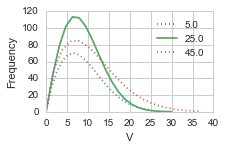

In [71]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)  

In [72]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)